# Formula One Insights with Pyton & SQL
Since its inception in the 1950s, Formula One has represented the pinnacle of global motorsport, pushing the boundaries of racing and automotive engineering. This analysis leverages Python and SQL to uncover insights into the achievements of drivers and constructors across F1's decades-long history.

*For a more detailed exploration, please refer to the accompanying PDF document. The comments within this Jupyter notebook are provided exclusively to explain the functionality of the code.*
*The values and data in this Jupyter Notebook were last updated on the 17th of January 2025.*

# Organizing the Notebook into Multiple Parts
Due to the extensive code in this notebook, it has been divided into five parts. The first notebook focuses on retrieving data from the formula1.com website. The second notebook handles data retrieval from the F1DB database. The third notebook is dedicated to creating statistics and visualizations. The fourth notebook explores the question of who is the Greatest Driver of All Time. The fifth notebook consolidates multiple CSV files into separate Excel worksheets.

# Exploratory Data Analysis and Visualizations

# Importing Python Libraries
This Jupyter notebook is designed to run on most modern Python installations. However, to ensure reproducibility, note that it was developed and tested with Python 3.12.3. The following libraries and their respective versions were used in this analysis:

- folium 0.17.0
- matplotlib 3.8.4
- pandas 2.2.2
- seaborn 0.13.2
- squarify 0.4.4

In [1]:
# Import libraries
import os
import sqlite3

import folium
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import squarify

from folium import Choropleth

print("Libraries imported")

Libraries imported


# Exploratory Data Analysis - Adding Datasets to SQLite Database

We load the datasets into an SQLite database, assigning each dataset to a separate table for structured storage and efficient querying.

In [2]:
# List CSV files and their corresponding table names
csv_files = {
    "csv/circuits.csv": "Circuits",
    "csv/constructors.csv": "Constructors",
    "csv/constructor_standings.csv": "ConstructorStandings",
    "csv/drivers.csv": "Drivers",
    "csv/driver_standings.csv": "DriverStandings",
    "csv/engine_manufacturers.csv": "EngineManufacturers",
    "csv/fastest_laps.csv": "FastestLaps",
    "csv/qualifying_results.csv": "QualifyingResults",
    "csv/race_results.csv": "RaceResults",
    "csv/race_winners.csv": "RaceWinners",
    "csv/races.csv": "Races",
    "csv/tyre_manufacturers.csv": "TyreManufacturers",
}

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect("formula one.db")

# Load each CSV into a table
for file, table_name in csv_files.items():
    # Read CSV into a DataFrame
    df = pd.read_csv(file)
    # Write the DataFrame to a SQL table
    df.to_sql(table_name, conn, if_exists="replace", index=False)
    print(f"Loaded {file} into table {table_name}.")

print("")

# List all tables in the SQLite database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print(tables)

# Close the connection
conn.close()

Loaded csv/circuits.csv into table Circuits.
Loaded csv/constructors.csv into table Constructors.
Loaded csv/constructor_standings.csv into table ConstructorStandings.
Loaded csv/drivers.csv into table Drivers.
Loaded csv/driver_standings.csv into table DriverStandings.
Loaded csv/engine_manufacturers.csv into table EngineManufacturers.
Loaded csv/fastest_laps.csv into table FastestLaps.
Loaded csv/qualifying_results.csv into table QualifyingResults.
Loaded csv/race_results.csv into table RaceResults.
Loaded csv/race_winners.csv into table RaceWinners.
Loaded csv/races.csv into table Races.
Loaded csv/tyre_manufacturers.csv into table TyreManufacturers.

                    name
0               Circuits
1           Constructors
2   ConstructorStandings
3                Drivers
4        DriverStandings
5    EngineManufacturers
6            FastestLaps
7      QualifyingResults
8            RaceResults
9            RaceWinners
10                 Races
11     TyreManufacturers


# Exploratory Data Analysis - Total Number of Drivers, Constructors, Circuits, Engine Manufacturers, Tyre Manufacturers

We begin the analysis with a high-level overview, calculating the total number of participants in Formula One over the years, including drivers, constructors, engine manufacturers, tyre manufacturers, and circuits.

In [3]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL queries
queries = {
    "Total number of drivers": "SELECT COUNT(DISTINCT Driver) FROM RaceResults;",
    "Total number of constructors": "SELECT COUNT(DISTINCT Constructor) FROM RaceResults;",
    "Total number of engine manufacturers": "SELECT COUNT(DISTINCT Engine) FROM RaceResults;",
    "Total number of tyre manufacturers": "SELECT COUNT(DISTINCT Tyre) FROM RaceResults;",
    "Total number of circuits": "SELECT COUNT(DISTINCT Name) FROM Circuits;"
}

# Execute each query and print the results
for label, query in queries.items():
    cursor = conn.execute(query)
    count = cursor.fetchone()[0]
    
    print(f"{label}: {count}")

# Close the connection
conn.close()

Total number of drivers: 856
Total number of constructors: 170
Total number of engine manufacturers: 70
Total number of tyre manufacturers: 9
Total number of circuits: 77


# Exploratory Data Analysis - Number of Drivers who won a Championship / Race or achieved a Podium Position / Pole Position

We calculate the number of drivers who have achieved any of the four key milestones in Formula One: winning a championship, winning a race, achieving a podium position, or securing a pole position.

In [4]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL queries
queries = {
    "Number of drivers who won a championship": """
        SELECT COUNT(DISTINCT Driver) AS DriversWhoWonChampionship
        FROM DriverStandings
        WHERE Position = 1;
    """,
    "Number of drivers who won a race": """
        SELECT COUNT(DISTINCT Driver) AS DriversWhoWonRace
        FROM RaceWinners;
    """,
    "Number of drivers who achieved a podium position": """
        SELECT COUNT(DISTINCT Driver) AS DriversWhoAchievedPodium
        FROM RaceResults
        WHERE Position IN (1, 2, 3);
    """,
    "Number of drivers who achieved a pole position": """
        SELECT COUNT(DISTINCT Driver) AS DriversWhoWonPolePosition
        FROM QualifyingResults
        WHERE Position = 1;
    """
}

# Execute each query and print the results
for label, query in queries.items():
    cursor = conn.execute(query)
    count = cursor.fetchone()[0]
    print(f"{label}: {count}")

# Close the connection
conn.close()

Number of drivers who won a championship: 34
Number of drivers who won a race: 115
Number of drivers who achieved a podium position: 212
Number of drivers who achieved a pole position: 105


# Exploratory Data Analysis - Number of Constructors who won a Championship / Race or achieved a Podium Position / Pole Position

In [5]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL queries
queries = {
    "Number of constructors who won a championship": """
        SELECT COUNT(DISTINCT Constructor) AS ConstructorsWhoWonChampionship
        FROM ConstructorStandings
        WHERE Position = 1;
    """,
    "Number of constructors who won a race": """
        SELECT COUNT(DISTINCT Constructor) AS ConstructorsWhoWonRace
        FROM RaceWinners;
    """,
    "Number of constructors who achieved a podium position": """
        SELECT COUNT(DISTINCT Constructor) AS ConstructorsWhoAchievedPodium
        FROM RaceResults
        WHERE Position IN (1, 2, 3);
    """,
    "Number of constructors who achieved a pole position": """
        SELECT COUNT(DISTINCT Constructor) AS ConstructorsWhoWonPolePosition
        FROM QualifyingResults
        WHERE Position = 1;
    """
}

# Execute each query and print the results
for label, query in queries.items():
    cursor = conn.execute(query)
    count = cursor.fetchone()[0]
    print(f"{label}: {count}")

# Close the connection
conn.close()

Number of constructors who won a championship: 15
Number of constructors who won a race: 35
Number of constructors who achieved a podium position: 55
Number of constructors who achieved a pole position: 39


# Exploratory Data Analysis - Number of Engine Manufacturers who won a Championship / Race or achieved a Podium Position / Pole Position

In [6]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL queries
queries = {
    "Number of engine manufacturers who won a race": """
        SELECT COUNT(DISTINCT Engine) AS EngineManufacturersWhoAchievedPodium
        FROM RaceResults
        WHERE Position = 1;
    """,
    "Number of engine manufacturers who achieved a podium position": """
        SELECT COUNT(DISTINCT Engine) AS EngineManufacturersWhoAchievedPodium
        FROM RaceResults
        WHERE Position IN (1, 2, 3);
    """,
    "Number of engine manufacturers who achieved a pole position": """
        SELECT COUNT(DISTINCT Engine) AS EngineManufacturersWhoWonPolePosition
        FROM QualifyingResults
        WHERE Position = 1;
    """
}

# Execute each query and print the results
for label, query in queries.items():
    cursor = conn.execute(query)
    count = cursor.fetchone()[0]
    print(f"{label}: {count}")

# Close the connection
conn.close()

Number of engine manufacturers who won a race: 18
Number of engine manufacturers who achieved a podium position: 33
Number of engine manufacturers who achieved a pole position: 24


# Data Visualization

We create visualizations to explore various Formula One statistics, including those related to drivers, constructors, engine manufacturers, and circuits. These visualizations include bar charts, line charts, treemap charts, and interactive Folium maps.

*We're not adding titles to the plots, because we're exporting them to PNG and using them in the PDF presentation. We're adding the necessary details there.*

# Data Visualization - Top 10 Charts

We create horizontal bar charts to showcase various top 10 rankings across key Formula One metrics, offering a clear and concise representation of the data. Additionally, the results of each SQL query are saved to a CSV file, which includes all entries for each statistic, not just the top 10.

# Data Visualization - Top 10 Drivers with the most Championships Won

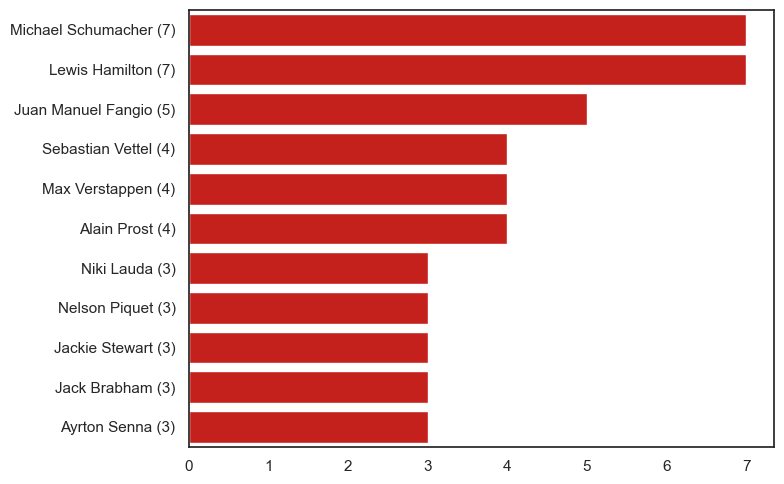

In [7]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Driver, 
    COUNT(*) AS ChampionshipsWon
FROM 
    DriverStandings
WHERE 
    Position = 1
GROUP BY 
    Driver
ORDER BY 
    ChampionshipsWon DESC;
"""

# Execute the query and load the results into a DataFrame
driver_most_championships = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
driver_top_10_championships = driver_most_championships.head(11).assign(
    DriverWithChampionships=lambda df: df.apply(
        lambda row: f"{row['Driver']} ({int(row['ChampionshipsWon'])})", axis=1
    )
)

# Seaborn Plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='ChampionshipsWon', 
    y='DriverWithChampionships', 
    data=driver_top_10_championships,
    orient='h',
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/driver_most_championship_wins.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
driver_most_championships.to_csv('results/driver_most_championship_wins.csv', index=False)

# Data Visualization - Top 10 Constructors with the most Championships Won

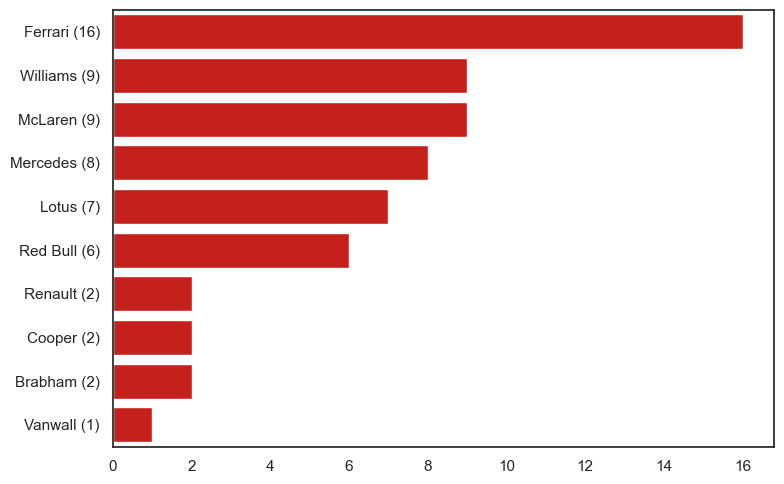

In [8]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Constructor, 
    COUNT(*) AS ChampionshipsWon
FROM 
    ConstructorStandings
WHERE 
    Position = 1
GROUP BY 
    Constructor
ORDER BY 
    ChampionshipsWon DESC;
"""

# Execute the query and load the results into a DataFrame
constructor_most_championships = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
constructor_top_10_championships = constructor_most_championships.head(10).assign(
    ConstructorWithChampionships=lambda df: df.apply(
        lambda row: f"{row['Constructor']} ({int(row['ChampionshipsWon'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='ChampionshipsWon', 
    y='ConstructorWithChampionships', 
    data=constructor_top_10_championships, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/constructor_most_championship_wins.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
constructor_most_championships.to_csv('results/constructor_most_championship_wins.csv', index=False)

# Data Visualization - Top 10 Drivers with the most Races Won

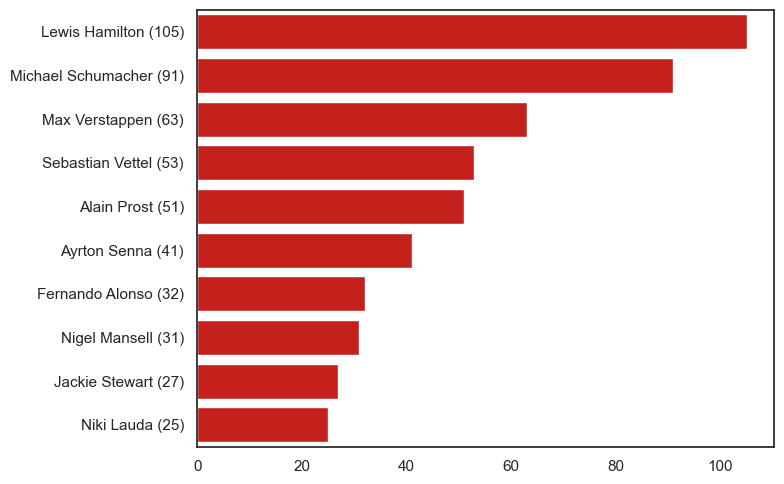

In [9]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Driver, 
    COUNT(*) AS RacesWon
FROM 
    RaceWinners
GROUP BY 
    Driver
ORDER BY 
    RacesWon DESC;
"""

# Execute the query and load the results into a DataFrame
driver_most_races = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
driver_top_10_races = driver_most_races.head(10).assign(
    DriverWithRaces=lambda df: df.apply(
        lambda row: f"{row['Driver']} ({int(row['RacesWon'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='RacesWon', 
    y='DriverWithRaces', 
    data=driver_top_10_races, 
    orient='h',
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/driver_most_race_wins.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
driver_most_races.to_csv('results/driver_most_race_wins.csv', index=False)

# Data Visualization - Top 10 Constructors with the most Races Won

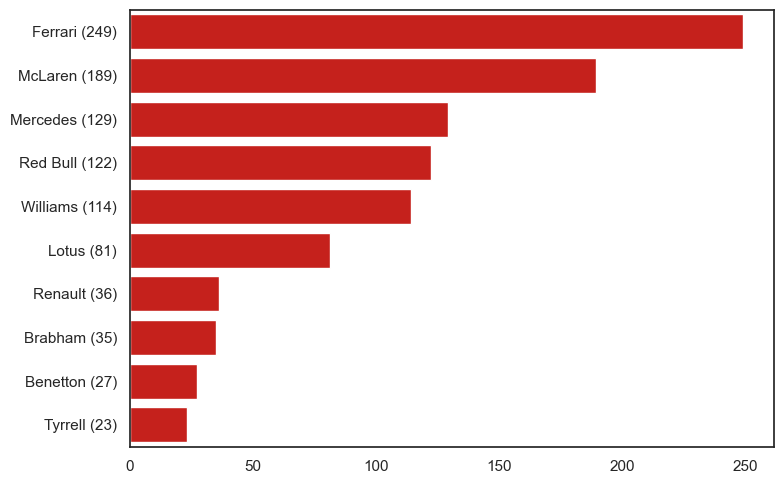

In [10]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Constructor, 
    COUNT(*) AS RacesWon
FROM 
    RaceWinners
GROUP BY 
    Constructor
ORDER BY 
    RacesWon DESC;
"""

# Execute the query and load the results into a DataFrame
constructor_most_races = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
constructor_top_10_races = constructor_most_races.head(10).assign(
    ConstructorWithRaces=lambda df: df.apply(
        lambda row: f"{row['Constructor']} ({int(row['RacesWon'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='RacesWon', 
    y='ConstructorWithRaces', 
    data=constructor_top_10_races, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/constructor_most_race_wins.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
constructor_most_races.to_csv('results/constructor_most_race_wins.csv', index=False)

# Data Visualization - Top 10 Drivers with the most Pole Positions Achieved

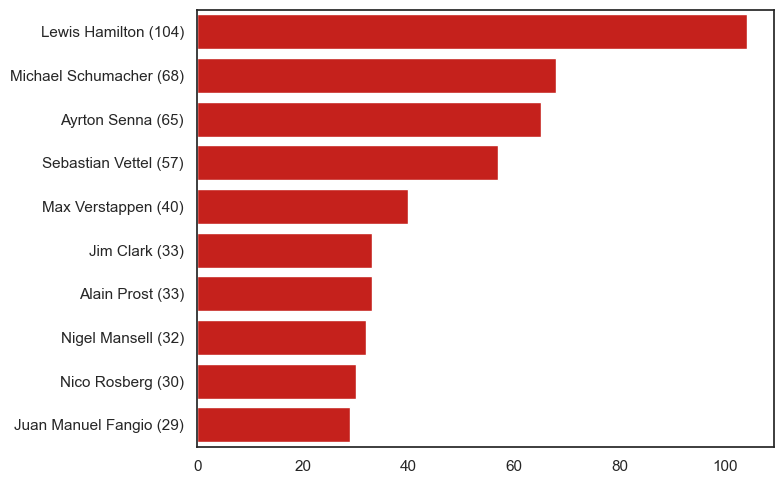

In [11]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Driver, 
    COUNT(*) AS PolePositionsAchieved
FROM 
    QualifyingResults
WHERE 
    Position = 1
GROUP BY 
    Driver
ORDER BY 
    PolePositionsAchieved DESC;
"""

# Execute the query and load the results into a DataFrame
driver_most_pole_positions = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
driver_top_10_pole_positions = driver_most_pole_positions.head(10).assign(
    DriverWithPolePositions=lambda df: df.apply(
        lambda row: f"{row['Driver']} ({int(row['PolePositionsAchieved'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='PolePositionsAchieved', 
    y='DriverWithPolePositions', 
    data=driver_top_10_pole_positions, 
    orient='h',
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/driver_most_pole_positions.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
driver_most_pole_positions.to_csv('results/driver_most_pole_positions.csv', index=False)

# Data Visualization - Top 10 Constructors with the most Pole Positions Achieved

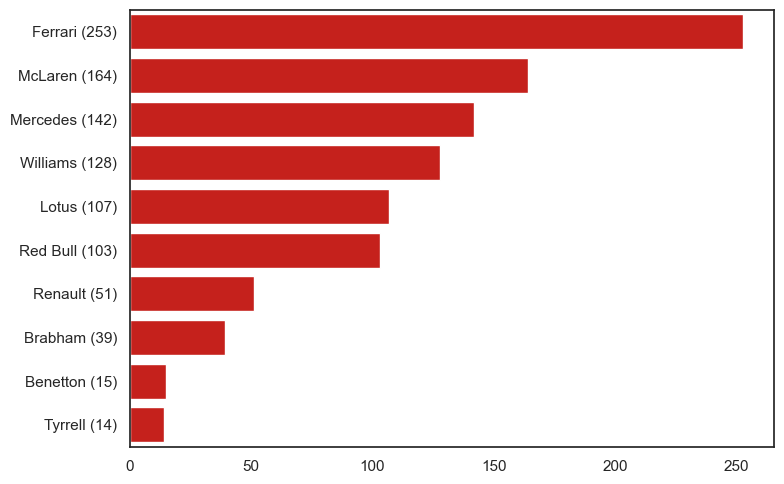

In [12]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Constructor, 
    COUNT(*) AS PolePositionsAchieved
FROM 
    QualifyingResults
WHERE 
    Position = 1
GROUP BY 
    Constructor
ORDER BY 
    PolePositionsAchieved DESC;
"""

# Execute the query and load the results into a DataFrame
constructor_most_pole_positions = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
constructor_top_10_pole_positions = constructor_most_pole_positions.head(10).assign(
    ConstructorWithPolePositions=lambda df: df.apply(
        lambda row: f"{row['Constructor']} ({int(row['PolePositionsAchieved'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='PolePositionsAchieved', 
    y='ConstructorWithPolePositions', 
    data=constructor_top_10_pole_positions, 
    orient='h',
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/constructor_most_pole_positions.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
constructor_most_pole_positions.to_csv('results/constructor_most_pole_positions.csv', index=False)

# Data Visualization - Top 10 Drivers with the most Podium Positions Achieved

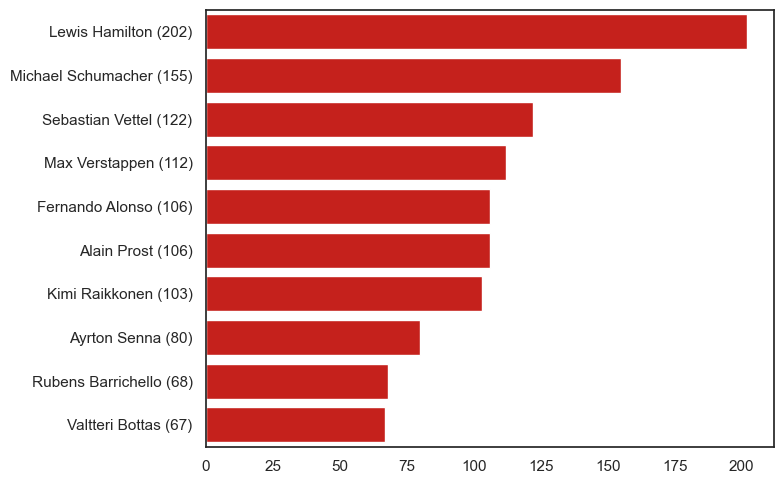

In [13]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Driver, 
    COUNT(*) AS PodiumsAchieved
FROM 
    RaceResults
WHERE 
    Position IN (1, 2, 3)
GROUP BY 
    Driver
ORDER BY 
    PodiumsAchieved DESC;
"""

# Execute the query and load the results into a DataFrame
driver_most_podiums = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
driver_top_10_podiums = driver_most_podiums.head(10).assign(
    DriverWithPodiums=lambda df: df.apply(
        lambda row: f"{row['Driver']} ({int(row['PodiumsAchieved'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='PodiumsAchieved', 
    y='DriverWithPodiums', 
    data=driver_top_10_podiums, 
    orient='h',
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/driver_most_podiums.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
driver_most_podiums.to_csv('results/driver_most_podiums.csv', index=False)

# Data Visualization - Top 10 Constructors with the most Podium Positions Achieved

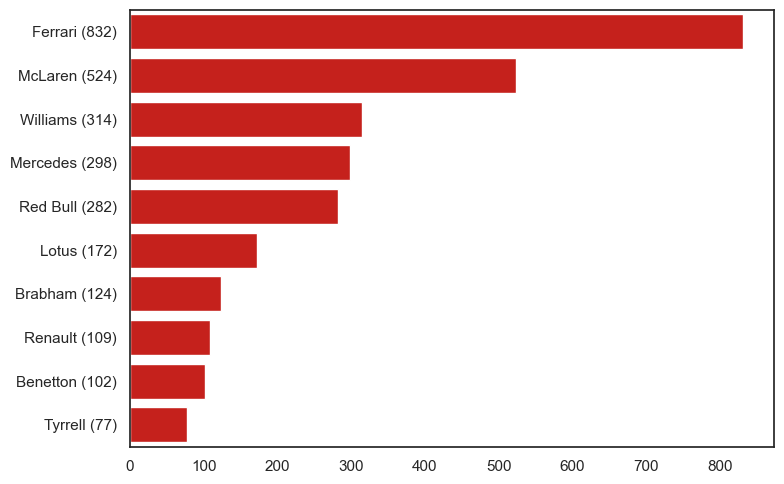

In [14]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Constructor, 
    COUNT(*) AS PodiumsAchieved
FROM 
    RaceResults
WHERE 
    Position IN (1, 2, 3)
GROUP BY 
    Constructor
ORDER BY 
    PodiumsAchieved DESC;
"""

# Execute the query and load the results into a DataFrame
constructor_most_podiums = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
constructor_top_10_podiums = constructor_most_podiums.head(10).assign(
    ConstructorWithPodiums=lambda df: df.apply(
        lambda row: f"{row['Constructor']} ({int(row['PodiumsAchieved'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='PodiumsAchieved', 
    y='ConstructorWithPodiums', 
    data=constructor_top_10_podiums, 
    orient='h',
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/constructor_most_podiums.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
constructor_most_podiums.to_csv('results/constructor_most_podiums.csv', index=False)

# Data Visualization - Top 10 Drivers with the most Fastest Laps Set

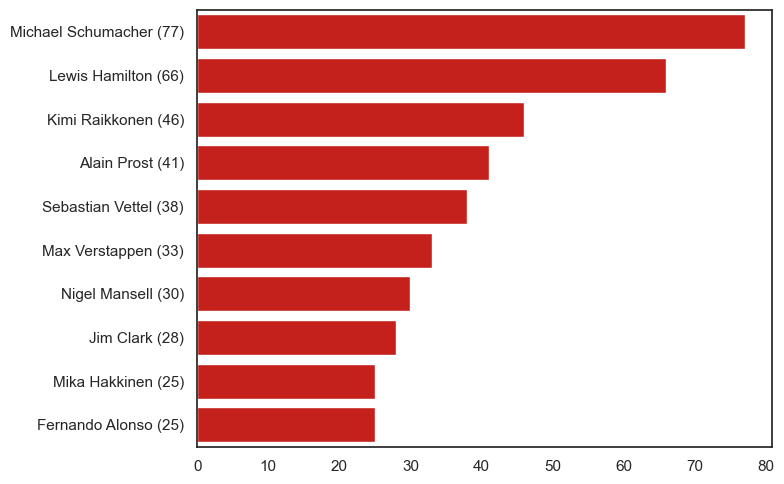

In [15]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Driver, 
    COUNT(*) AS FastestLapsSet
FROM 
    FastestLaps
GROUP BY 
    Driver
ORDER BY 
    FastestLapsSet DESC;
"""

# Execute the query and load the results into a DataFrame
driver_most_fastest_laps = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
driver_top_10_fastest_laps = driver_most_fastest_laps.head(10).assign(
    DriverWithFastestLaps=lambda df: df.apply(
        lambda row: f"{row['Driver']} ({int(row['FastestLapsSet'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='FastestLapsSet', 
    y='DriverWithFastestLaps', 
    data=driver_top_10_fastest_laps, 
    orient='h',
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/driver_most_fastest_laps.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
driver_most_fastest_laps.to_csv('results/driver_most_fastest_laps.csv', index=False)

# Data Visualization - Top 10 Constructors with the most Fastest Laps Set

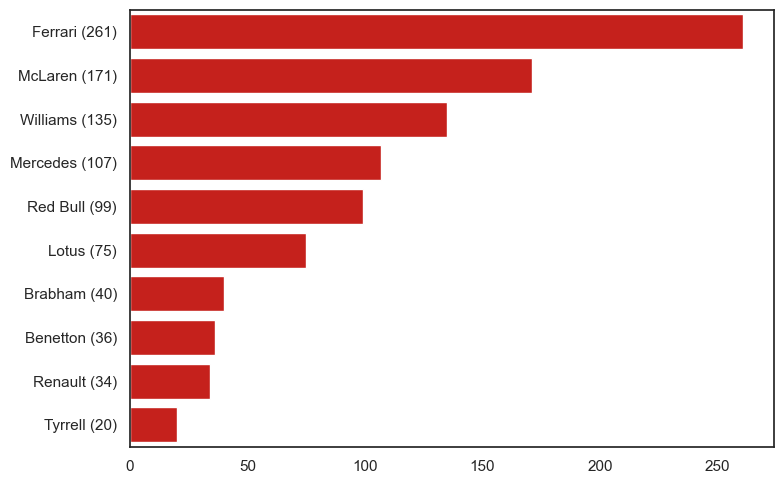

In [16]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Constructor, 
    COUNT(*) AS FastestLapsSet
FROM 
    FastestLaps
GROUP BY 
    Constructor
ORDER BY 
    FastestLapsSet DESC;
"""

# Execute the query and load the results into a DataFrame
constructor_most_fastest_laps = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
constructor_top_10_fastest_laps = constructor_most_fastest_laps.head(10).assign(
    ConstructorWithFastestLaps=lambda df: df.apply(
        lambda row: f"{row['Constructor']} ({int(row['FastestLapsSet'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='FastestLapsSet', 
    y='ConstructorWithFastestLaps', 
    data=constructor_top_10_fastest_laps, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/constructor_most_fastest_laps.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
constructor_most_fastest_laps.to_csv('results/constructor_most_fastest_laps.csv', index=False)

# Data Visualization - Top 10 Drivers with the most Race Entries

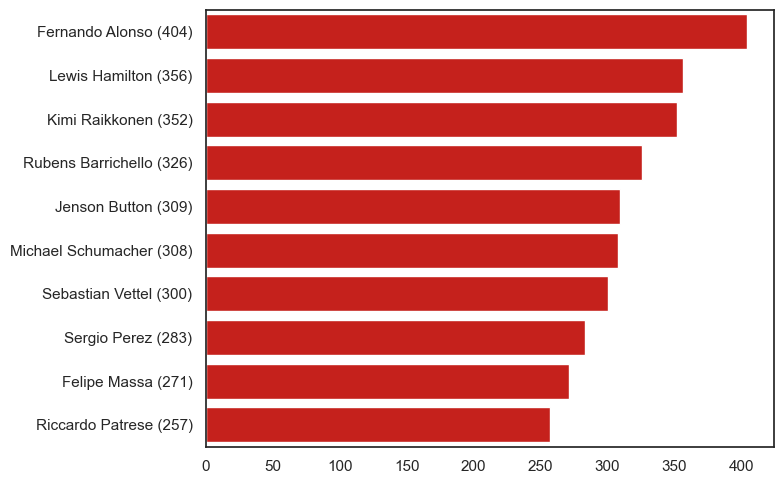

In [17]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Driver, 
    COUNT(*) AS NumberOfEntries
FROM 
    RaceResults
GROUP BY 
    Driver
ORDER BY 
    NumberOfEntries DESC;
"""

# Execute queries and load results into DataFrames
driver_most_entries = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
driver_top_10_most_entries = driver_most_entries.head(10).assign(
    DriverWithNumberOfEntries=lambda df: df.apply(
        lambda row: f"{row['Driver']} ({int(row['NumberOfEntries'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='NumberOfEntries', 
    y='DriverWithNumberOfEntries', 
    data=driver_top_10_most_entries, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/driver_most_race_entries.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
driver_most_entries.to_csv('results/driver_most_race_entries.csv', index=False)

# Data Visualization - Top 10 Constructors with the most Race Entries

Each constructor typically has two entries per race (or more in the early days), which explains why Ferrari, for example, has 2,445 entries - more than twice the total number of F1 races held to date.

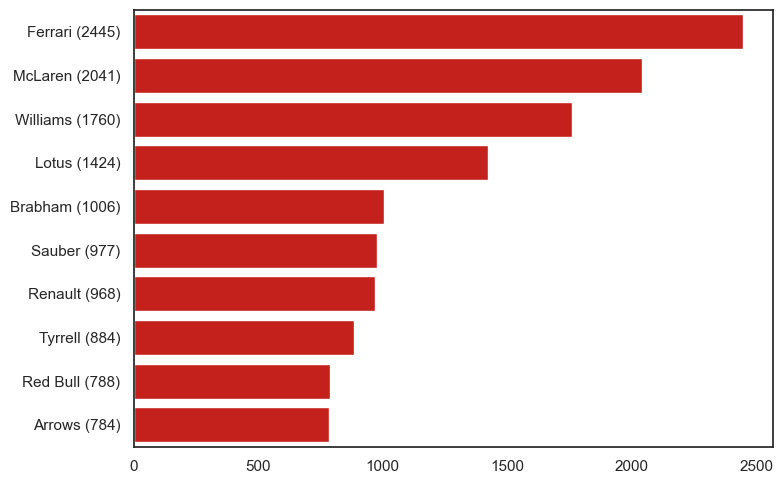

In [18]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Constructor, 
    COUNT(*) AS NumberOfEntries
FROM 
    RaceResults
GROUP BY 
    Constructor
ORDER BY 
    NumberOfEntries DESC;
"""

# Execute queries and load results into DataFrames
constructor_most_entries = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
constructor_top_10_most_entries = constructor_most_entries.head(10).assign(
    ConstructorWithNumberOfEntries=lambda df: df.apply(
        lambda row: f"{row['Constructor']} ({int(row['NumberOfEntries'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='NumberOfEntries', 
    y='ConstructorWithNumberOfEntries', 
    data=constructor_top_10_most_entries, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/constructor_most_race_entries.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
constructor_most_entries.to_csv('results/constructor_most_race_entries.csv', index=False)

# Data Visualization - Top 10 Drivers with the most Race Entries without a Win

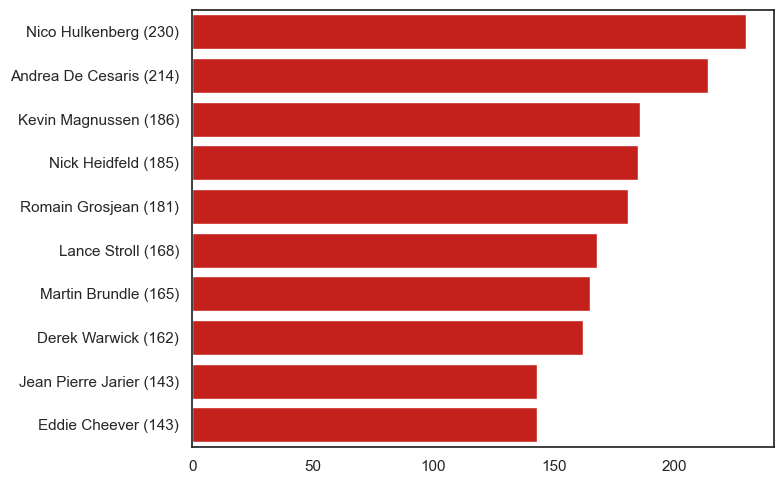

In [19]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Driver, 
    COUNT(*) AS NumberOfEntries
FROM 
    RaceResults
WHERE 
    Driver NOT IN (
        SELECT DISTINCT Driver
        FROM RaceResults
        WHERE Position = 1
    )
GROUP BY 
    Driver
ORDER BY 
    NumberOfEntries DESC;
"""

# Execute query and load results into a DataFrame
driver_no_wins = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
driver_top_10_no_wins = driver_no_wins.head(10).assign(
    DriverWithEntriesNoWin=lambda df: df.apply(
        lambda row: f"{row['Driver']} ({int(row['NumberOfEntries'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='NumberOfEntries', 
    y='DriverWithEntriesNoWin', 
    data=driver_top_10_no_wins, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/driver_most_entries_no_win.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
driver_no_wins.to_csv('results/driver_most_entries_no_win.csv', index=False)

# Data Visualization - Top 10 Constructors with the most Race Entries without a Win

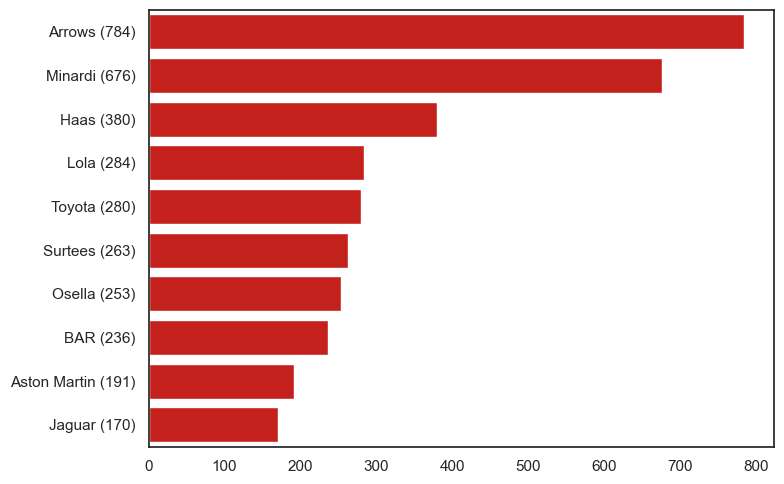

In [20]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Constructor, 
    COUNT(*) AS NumberOfEntries
FROM 
    RaceResults
WHERE 
    Constructor NOT IN (
        SELECT DISTINCT Constructor
        FROM RaceResults
        WHERE Position = 1
    )
GROUP BY 
    Constructor
ORDER BY 
    NumberOfEntries DESC;
"""

# Execute query and load results into a DataFrame
constructor_no_wins = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
constructor_top_10_no_wins = constructor_no_wins.head(10).assign(
    ConstructorWithEntriesNoWin=lambda df: df.apply(
        lambda row: f"{row['Constructor']} ({int(row['NumberOfEntries'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='NumberOfEntries', 
    y='ConstructorWithEntriesNoWin', 
    data=constructor_top_10_no_wins, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/constructor_most_entries_no_win.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
constructor_no_wins.to_csv('results/constructor_most_entries_no_win.csv', index=False)

# Data Visualization - Top 10 Drivers with the Highest Number of DNFs

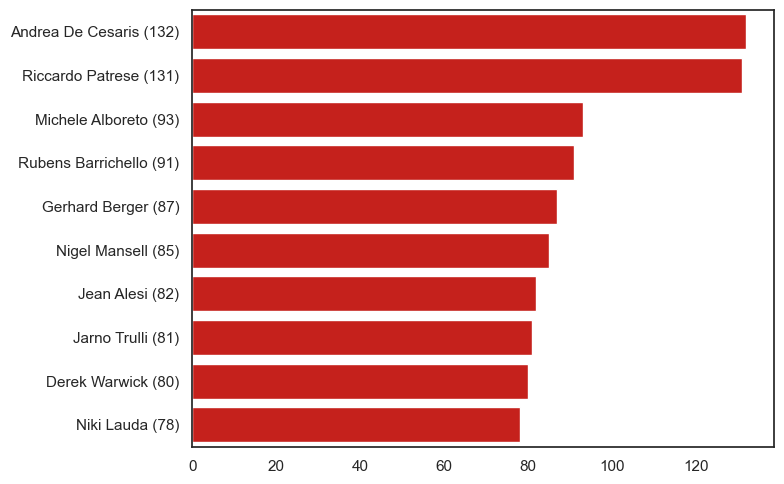

In [21]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Driver, 
    COUNT(*) AS NumberOfDNFs
FROM 
    RaceResults
WHERE 
    Retired = 'DNF'
GROUP BY 
    Driver
ORDER BY 
    NumberOfDNFs DESC;
"""

# Execute query and load results into a DataFrame
driver_most_dnfs = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
driver_top_10_most_dnfs = driver_most_dnfs.head(10).assign(
    DriverWithNumberOfDNFs=lambda df: df.apply(
        lambda row: f"{row['Driver']} ({int(row['NumberOfDNFs'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='NumberOfDNFs', 
    y='DriverWithNumberOfDNFs', 
    data=driver_top_10_most_dnfs, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/driver_most_dnfs.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
driver_most_dnfs.to_csv('results/driver_most_dnfs.csv', index=False)

# Data Visualization - Top 10 Constructors with the Highest Number of DNFs

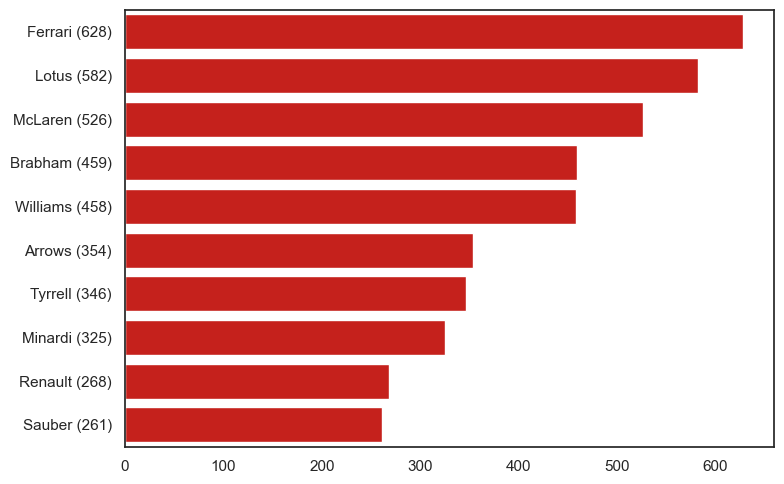

In [22]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Constructor, 
    COUNT(*) AS NumberOfDNFs
FROM 
    RaceResults
WHERE 
    Retired = 'DNF'
GROUP BY 
    Constructor
ORDER BY 
    NumberOfDNFs DESC;
"""

# Execute query and load results into a DataFrame
constructor_most_dnfs = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
constructor_top_10_most_dnfs = constructor_most_dnfs.head(10).assign(
    ConstructorWithNumberOfDNFs=lambda df: df.apply(
        lambda row: f"{row['Constructor']} ({int(row['NumberOfDNFs'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='NumberOfDNFs', 
    y='ConstructorWithNumberOfDNFs', 
    data=constructor_top_10_most_dnfs, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/constructor_most_dnfs.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
constructor_most_dnfs.to_csv('results/constructor_most_dnfs.csv', index=False)

# Data Visualization - Top 10 Engine Manufacturers with the most Race Entries

Engine manufacturers often supply multiple teams each season, which accounts for the high entry numbers.

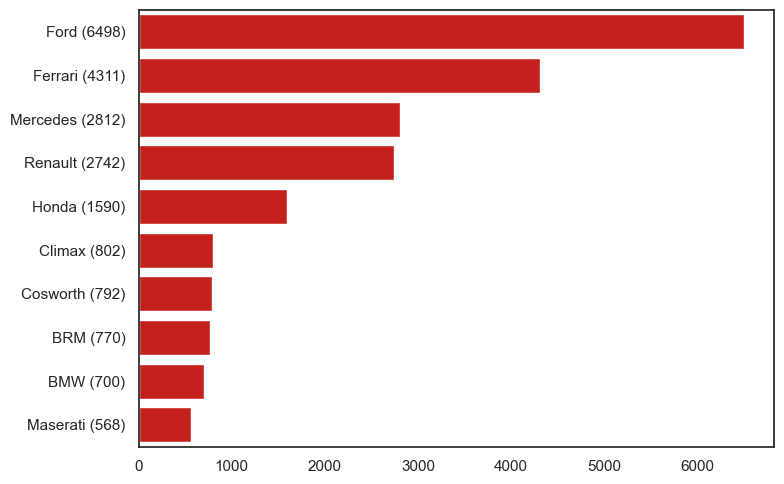

In [23]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Engine, 
    COUNT(*) AS NumberOfEntries
FROM 
    RaceResults
GROUP BY 
    Engine
ORDER BY 
    NumberOfEntries DESC;
"""

# Execute queries and load results into DataFrames
engine_most_entries = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
engine_top_10_most_entries = engine_most_entries.head(10).assign(
    EngineManufacturerWithNumberOfEntries=lambda df: df.apply(
        lambda row: f"{row['Engine']} ({int(row['NumberOfEntries'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='NumberOfEntries', 
    y='EngineManufacturerWithNumberOfEntries', 
    data=engine_top_10_most_entries, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/engine_most_race_entries.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
engine_most_entries.to_csv('results/engine_most_race_entries.csv', index=False)

# Data Visualization - Top 10 Engine Manufacturers with the Highest Number of DNFs

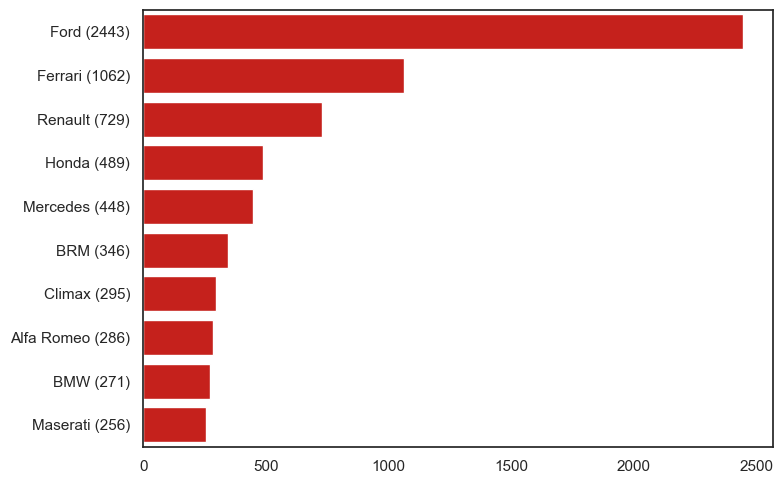

In [24]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Engine, 
    COUNT(*) AS NumberOfDNFs
FROM 
    RaceResults
WHERE 
    Retired = 'DNF'
GROUP BY 
    Engine
ORDER BY 
    NumberOfDNFs DESC;
"""

# Execute query and load results into a DataFrame
engine_most_dnfs = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
engine_top_10_most_dnfs = engine_most_dnfs.head(10).assign(
    EngineManufacturerWithNumberOfDNFs=lambda df: df.apply(
        lambda row: f"{row['Engine']} ({int(row['NumberOfDNFs'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='NumberOfDNFs', 
    y='EngineManufacturerWithNumberOfDNFs', 
    data=engine_top_10_most_dnfs, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/engine_most_dnfs.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
engine_most_dnfs.to_csv('results/engine_most_dnfs.csv', index=False)

# Data Visualization - Top 10 Engine Manufacturers with the most Race Entries without a Win

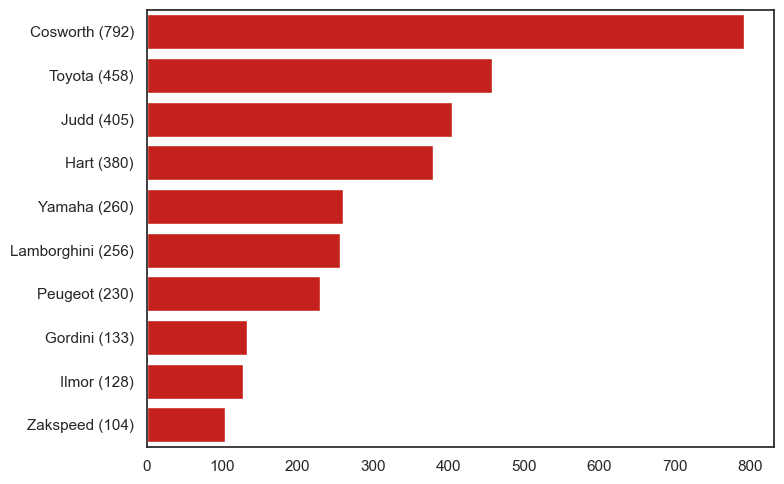

In [25]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Engine, 
    COUNT(*) AS NumberOfEntries
FROM 
    RaceResults
WHERE 
    Engine NOT IN (
        SELECT DISTINCT Engine
        FROM RaceResults
        WHERE Position = 1
    )
GROUP BY 
    Engine
ORDER BY 
    NumberOfEntries DESC;
"""

# Execute query and load results into a DataFrame
engine_no_wins = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
engine_top_10_no_wins = engine_no_wins.head(10).assign(
    EngineManufacturerWithEntriesNoWin=lambda df: df.apply(
        lambda row: f"{row['Engine']} ({int(row['NumberOfEntries'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='NumberOfEntries', 
    y='EngineManufacturerWithEntriesNoWin', 
    data=engine_top_10_no_wins, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/engine_most_entries_no_win.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
engine_no_wins.to_csv('results/engine_most_entries_no_win.csv', index=False)

# Data Visualization - Top 10 Tyre Manufacturers with the most Race Entries

In Formula One, a total of nine tyre manufacturers have participated, with some eras dominated by a single supplier. This contributes to the high entry numbers.

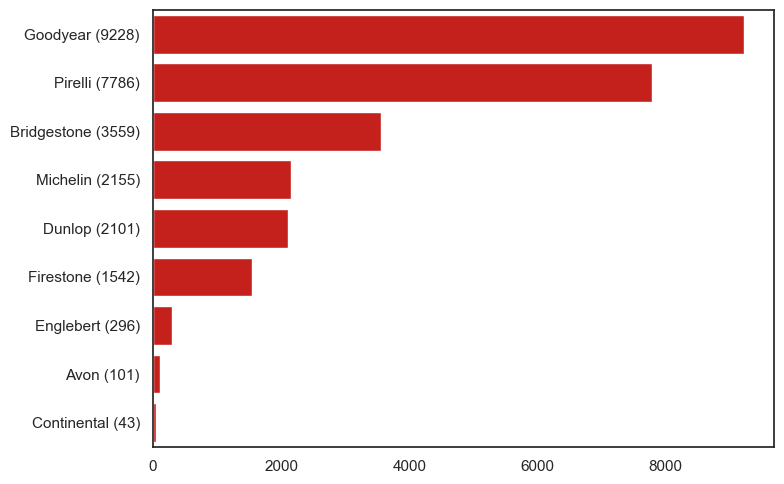

In [26]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Tyre, 
    COUNT(*) AS NumberOfEntries
FROM 
    RaceResults
GROUP BY 
    Tyre
ORDER BY 
    NumberOfEntries DESC;
"""

# Execute queries and load results into DataFrames
tyre_most_entries = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
tyre_top_10_most_entries = tyre_most_entries.head(10).assign(
    TyreManufacturerWithNumberOfEntries=lambda df: df.apply(
        lambda row: f"{row['Tyre']} ({int(row['NumberOfEntries'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='NumberOfEntries', 
    y='TyreManufacturerWithNumberOfEntries', 
    data=tyre_top_10_most_entries, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/tyre_most_race_entries.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
tyre_most_entries.to_csv('results/tyre_most_race_entries.csv', index=False)

# Data Visualization - Top 10 Most Raced-On Circuits

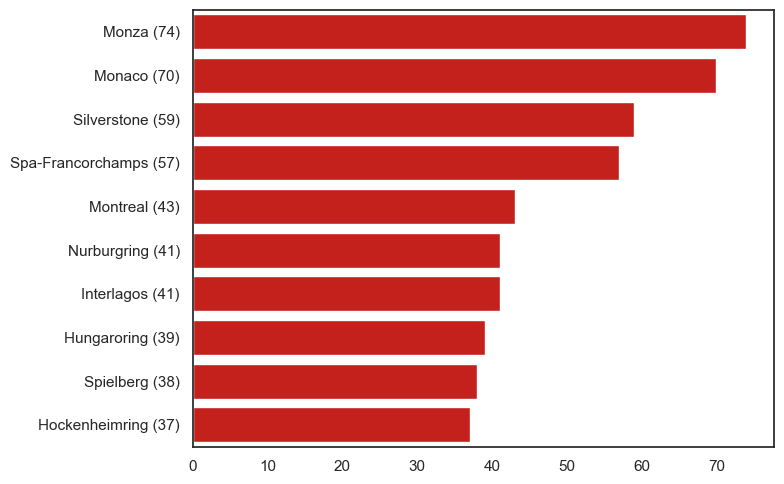

In [27]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Circuit, 
    COUNT(*) AS RaceCount
FROM 
    Races
GROUP BY 
    Circuit
ORDER BY 
    RaceCount DESC;
"""

# Execute the query and load the results into a DataFrame
most_raced_circuits = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Limit to top 10 and create a new column for formatted labels
top_10_circuits = most_raced_circuits.head(10).assign(
    CircuitWithRaceCount=lambda df: df.apply(
        lambda row: f"{row['Circuit']} ({int(row['RaceCount'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='RaceCount', 
    y='CircuitWithRaceCount', 
    data=top_10_circuits, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/circuit_most_races.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
most_raced_circuits.to_csv('results/circuit_most_races.csv', index=False)

# Data Visualization - Top 10 Oldest Circuits Still Raced On

For this query, we first identify the circuits raced on in 2024 and then sort them from oldest to newest based on the first year they hosted a race. Circuits with periods of hiatus are still included in this statistic.

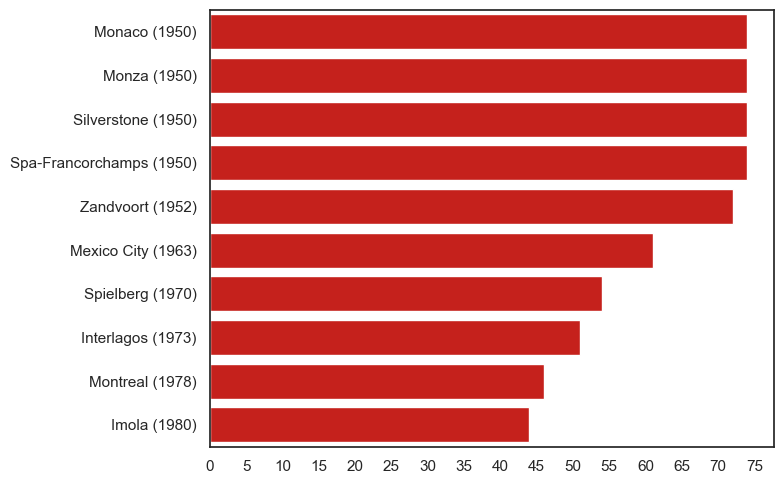

In [28]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
WITH OldestCircuits AS (
    SELECT 
        Circuit, 
        MIN(Season) AS FirstSeason
    FROM 
        Races
    GROUP BY 
        Circuit
),
CircuitsIn2024 AS (
    SELECT DISTINCT 
        Circuit
    FROM 
        Races
    WHERE 
        Season = 2024
)
SELECT 
    oc.Circuit, 
    oc.FirstSeason
FROM 
    OldestCircuits oc
JOIN 
    CircuitsIn2024 c24
ON 
    oc.Circuit = c24.Circuit
ORDER BY 
    FirstSeason ASC;
"""

# Execute query and load results into a DataFrame
oldest_circuits_2024 = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Create a new column for formatted labels
top_10_oldest_circuits_2024 = oldest_circuits_2024.head(10).assign(
    CircuitWithYear=lambda df: df.apply(
        lambda row: f"{row['Circuit']} ({row['FirstSeason']})", axis=1
    )
)

# Convert 'FirstSeason' to 'Years Raced On'
top_10_oldest_circuits_2024['YearsRacedOn'] = 2024 - top_10_oldest_circuits_2024['FirstSeason']

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='YearsRacedOn', 
    y='CircuitWithYear', 
    data=top_10_oldest_circuits_2024, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0, top_10_oldest_circuits_2024['YearsRacedOn'].max() + 5, 5))
plt.tight_layout()
plt.savefig('charts/circuit_oldest.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
oldest_circuits_2024.to_csv('results/circuit_oldest.csv', index=False)

# Data Visualization - Top 10 Circuits with the Highest Number of DNFs

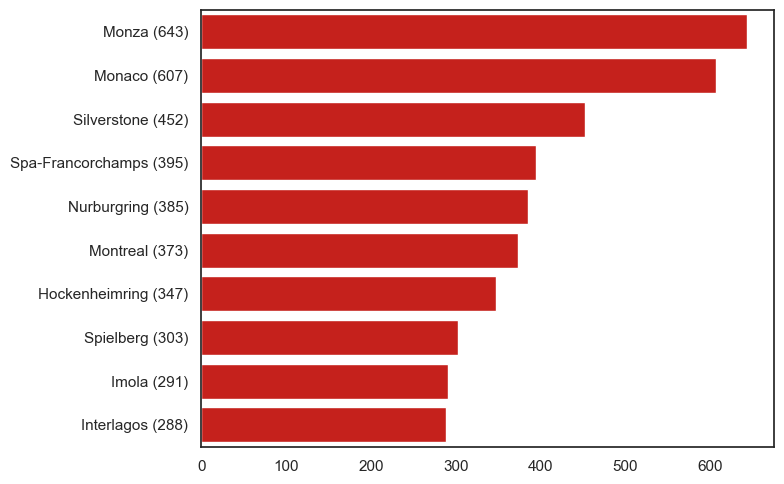

In [29]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    r.Circuit, 
    COUNT(*) AS NumberOfDNFs
FROM 
    RaceResults rr
JOIN 
    Races r
ON 
    rr.Season = r.Season AND rr.Round = r.Round
WHERE 
    rr.Retired = 'DNF'
GROUP BY 
    r.Circuit
ORDER BY 
    NumberOfDNFs DESC;
"""

# Execute the query and load the results into a DataFrame
top_dnf_circuits = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Create a new column for formatted labels
top_10_dnf_circuits = top_dnf_circuits.head(10).assign(
    CircuitWithDNFs=lambda df: df.apply(
        lambda row: f"{row['Circuit']} ({row['NumberOfDNFs']})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    x='NumberOfDNFs', 
    y='CircuitWithDNFs', 
    data=top_10_dnf_circuits, 
    orient='h', 
    color="#e10600"
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/circuit_most_dnfs.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
top_dnf_circuits.to_csv('results/circuit_most_dnfs.csv', index=False)

# Data Visualization - World Maps

We use Folium to create interactive maps displaying the origins of F1 drivers, constructors, and the locations of F1 circuits. To achieve a clean and minimalist aesthetic, we use map tiles provided by Stamen Design.

# Data Visualization - World Map of Drivers

In [30]:
# Connect to SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT Country, COUNT(*) as DriverCount
FROM Drivers
GROUP BY Country
ORDER BY DriverCount DESC;
"""
drivers_by_country = pd.read_sql_query(query, conn)
conn.close()

# Load world GeoJSON data
world_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Create a Folium map with Stamen Toner Lite
f1_map_driver = folium.Map(
    location=[50, 0],
    zoom_start=2,
    tiles='https://stamen-tiles.a.ssl.fastly.net/toner-lite/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
)

# Add a simple choropleth layer
Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=drivers_by_country,
    columns=['Country', 'DriverCount'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.75,
    line_opacity=0.10,
    legend_name='Number of Drivers',
    nan_fill_color='white'
).add_to(f1_map_driver)

# Save and display the map
f1_map_driver.save('maps/driver_map.html')
f1_map_driver

# Data Visualization - Top 10 Countries with the Highest Number of Drivers

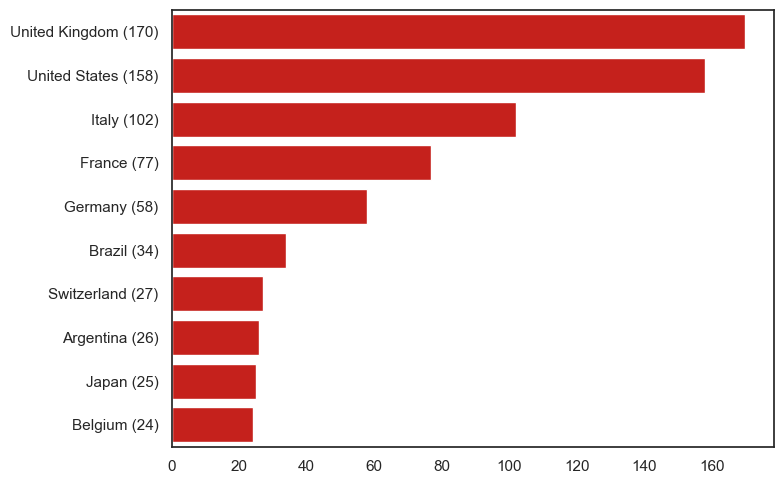

In [31]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Country, 
    COUNT(*) AS DriverCount
FROM 
    Drivers
GROUP BY 
    Country
ORDER BY 
    DriverCount DESC;
"""

# Execute the query and load the results into a DataFrame
top_driver_countries = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Create a new column for formatted labels
top_10_driver_countries = top_driver_countries.head(10).assign(
    CountryWithDrivers=lambda df: df.apply(
        lambda row: f"{row['Country']} ({row['DriverCount']})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
ax = sns.barplot(
    x='DriverCount', 
    y='CountryWithDrivers', 
    data=top_10_driver_countries, 
    orient='h', 
    color="#e10600"
)
current_ticks = ax.get_yticks()
new_labels = [
    label.get_text().replace("United States of America", "United States") 
    for label in ax.get_yticklabels()
]
ax.set_yticks(current_ticks)
ax.set_yticklabels(new_labels)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/country_most_drivers.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
top_driver_countries.to_csv('results/country_most_drivers.csv', index=False)

# Data Visualization - World Map of Constructors

In [32]:
# Connect to SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT Country, COUNT(*) as ConstructorCount
FROM Constructors
GROUP BY Country
ORDER BY ConstructorCount DESC;
"""
constructors_by_country = pd.read_sql_query(query, conn)
conn.close()

# Load world GeoJSON data
world_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Create a Folium map with Stamen Toner Lite
f1_map_constructor = folium.Map(
    location=[50, 0],
    zoom_start=2,
    tiles='https://stamen-tiles.a.ssl.fastly.net/toner-lite/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
)

# Add a simple choropleth layer
Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=constructors_by_country,
    columns=['Country', 'ConstructorCount'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.75,
    line_opacity=0.10,
    legend_name='Number of Constructors',
    nan_fill_color='white'
).add_to(f1_map_constructor)

# Save and display the map
f1_map_constructor.save('maps/constructor_map.html')
f1_map_constructor

# Data Visualization - Top 10 Countries with the Highest Number of Constructors

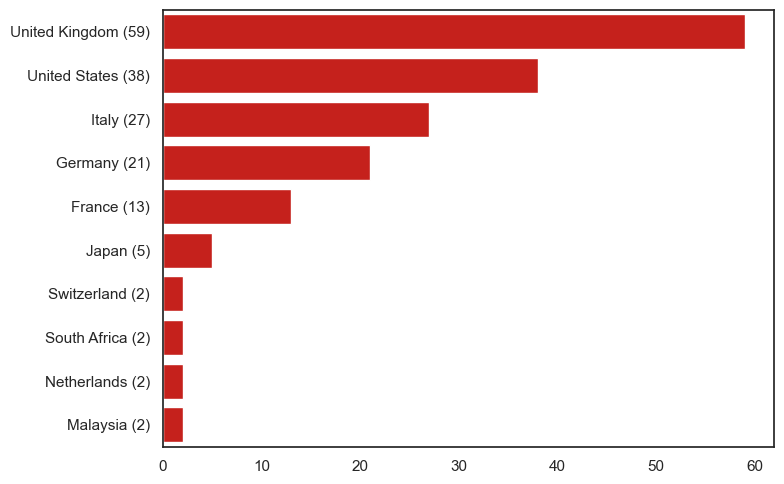

In [33]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Country, 
    COUNT(*) AS ConstructorCount
FROM 
    Constructors
GROUP BY 
    Country
ORDER BY 
    ConstructorCount DESC;
"""

# Execute the query and load the results into a DataFrame
top_constructor_countries = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Create a new column for formatted labels
top_10_constructor_countries = top_constructor_countries.head(10).assign(
    CountryWithConstructors=lambda df: df.apply(
        lambda row: f"{row['Country']} ({row['ConstructorCount']})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
ax = sns.barplot(
    x='ConstructorCount', 
    y='CountryWithConstructors', 
    data=top_10_constructor_countries, 
    orient='h', 
    color="#e10600"
)
current_ticks = ax.get_yticks()
new_labels = [
    label.get_text().replace("United States of America", "United States") 
    for label in ax.get_yticklabels()
]
ax.set_yticks(current_ticks)
ax.set_yticklabels(new_labels)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/country_most_constructors.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
top_constructor_countries.to_csv('results/country_most_constructors.csv', index=False)

# Data Visualization - World Map of Circuits

In [34]:
# Connect to SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT Country, COUNT(*) as CircuitCount
FROM Circuits
GROUP BY Country
ORDER BY CircuitCount DESC;
"""
circuits_by_country = pd.read_sql_query(query, conn)
conn.close()

# Load world GeoJSON data
world_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Create a Folium map with Stamen Toner Lite
f1_map_circuit = folium.Map(
    location=[50, 0],
    zoom_start=2,
    tiles='https://stamen-tiles.a.ssl.fastly.net/toner-lite/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
)

# Add a simple choropleth layer
Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=circuits_by_country,
    columns=['Country', 'CircuitCount'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.75,
    line_opacity=0.10,
    legend_name='Number of Circuits',
    nan_fill_color='white'
).add_to(f1_map_circuit)

# Save and display the map
f1_map_circuit.save('maps/circuit_map.html')
f1_map_circuit

# Data Visualization - Top 10 Countries with the Highest Number of Circuits

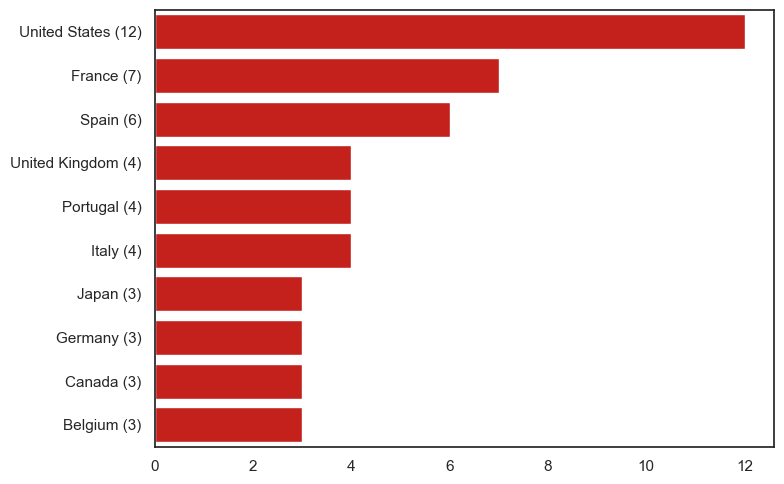

In [35]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Country, 
    COUNT(*) AS CircuitCount
FROM 
    Circuits
GROUP BY 
    Country
ORDER BY 
    CircuitCount DESC;
"""

# Execute the query and load the results into a DataFrame
top_circuit_countries = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Create a new column for formatted labels
top_10_circuit_countries = top_circuit_countries.head(10).assign(
    CountryWithCircuits=lambda df: df.apply(
        lambda row: f"{row['Country']} ({row['CircuitCount']})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
ax = sns.barplot(
    x='CircuitCount', 
    y='CountryWithCircuits', 
    data=top_10_circuit_countries, 
    orient='h', 
    color="#e10600"
)
current_ticks = ax.get_yticks()
new_labels = [
    label.get_text().replace("United States of America", "United States") 
    for label in ax.get_yticklabels()
]
ax.set_yticks(current_ticks)
ax.set_yticklabels(new_labels)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/country_most_circuits.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
top_circuit_countries.to_csv('results/country_most_circuits.csv', index=False)

# Data Visualization - Top 10 Countries with the Most Driver Championships Won

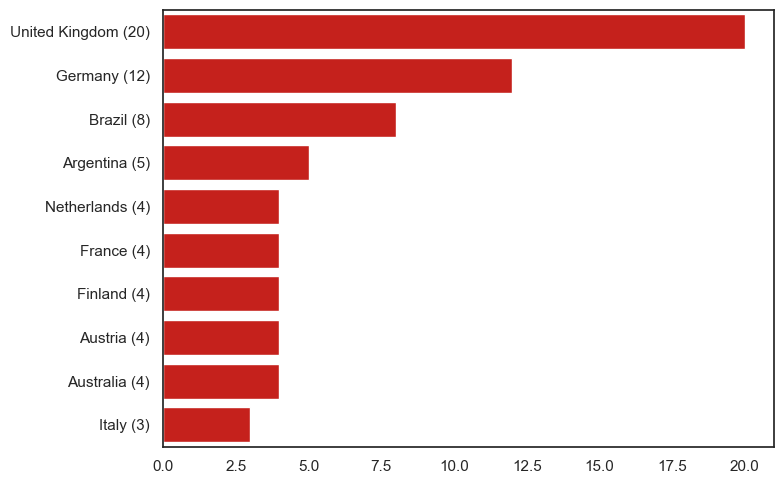

In [36]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    Country, 
    COUNT(*) AS ChampionshipsWon
FROM 
    DriverStandings
WHERE
    Position = 1
GROUP BY 
    Country
ORDER BY 
    ChampionshipsWon DESC;
"""

# Execute the query and load the results into a DataFrame
top_driver_championship_countries = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Create a new column for formatted labels
top_10_driver_championship_countries = top_driver_championship_countries.head(10).assign(
    CountryWithDriverChampionships=lambda df: df.apply(
        lambda row: f"{row['Country']} ({row['ChampionshipsWon']})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
ax = sns.barplot(
    x='ChampionshipsWon', 
    y='CountryWithDriverChampionships', 
    data=top_10_driver_championship_countries, 
    orient='h', 
    color="#e10600"
)
current_ticks = ax.get_yticks()
new_labels = [
    label.get_text().replace("United States of America", "United States") 
    for label in ax.get_yticklabels()
]
ax.set_yticks(current_ticks)
ax.set_yticklabels(new_labels)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/country_most_driver_championships.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
top_driver_championship_countries.to_csv('results/country_most_driver_championships.csv', index=False)

# Data Visualization - Top 10 Countries with the Most Races Won by Drivers

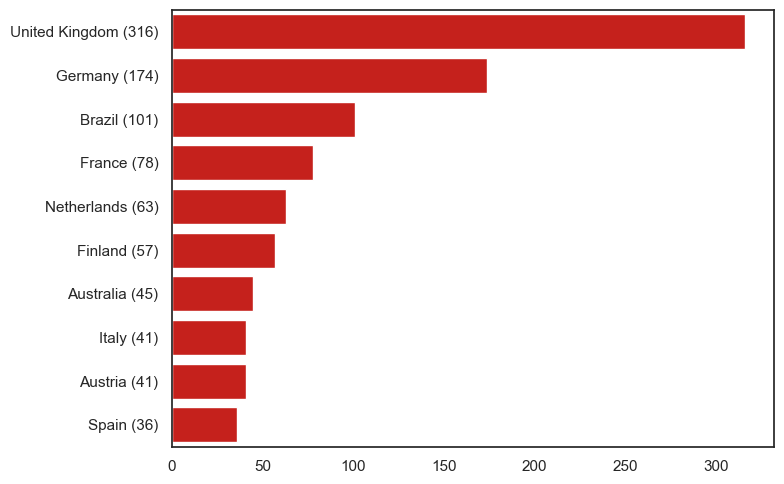

In [37]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    d.Country, 
    COUNT(*) AS RacesWon
FROM 
    RaceResults rr
JOIN 
    Drivers d
ON 
    rr.Driver = d.Name
WHERE 
    rr.Position = 1
GROUP BY 
    d.Country
ORDER BY 
    RacesWon DESC;
"""

# Execute the query and load the results into a DataFrame
top_countries_wins = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Create a new column for formatted labels
top_10_countries_wins = top_countries_wins.head(10).assign(
    CountryWithWins=lambda df: df.apply(
        lambda row: f"{row['Country']} ({int(row['RacesWon'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
ax = sns.barplot(
    x='RacesWon', 
    y='CountryWithWins', 
    data=top_10_countries_wins, 
    orient='h', 
    color="#e10600"
)
current_ticks = ax.get_yticks()
new_labels = [
    label.get_text().replace("United States of America", "United States") 
    for label in ax.get_yticklabels()
]
ax.set_yticks(current_ticks)
ax.set_yticklabels(new_labels)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/country_most_driver_race_wins.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
top_countries_wins.to_csv('results/country_most_driver_race_wins.csv', index=False)

# Data Visualization - Top 10 Countries with the Most Race Entries by Drivers

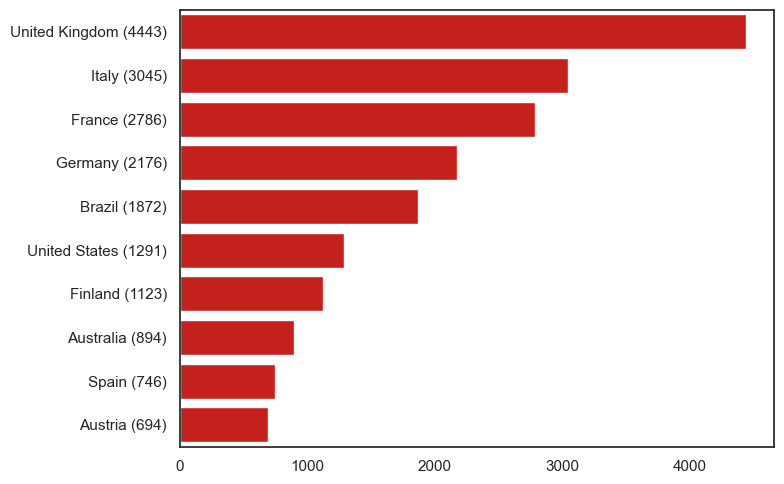

In [38]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT 
    d.Country, 
    SUM(DriverEntries.TotalEntries) AS TotalEntries
FROM 
    (SELECT 
        Driver, 
        COUNT(*) AS TotalEntries
     FROM 
        RaceResults
     GROUP BY 
        Driver) AS DriverEntries
JOIN 
    Drivers d
ON 
    DriverEntries.Driver = d.Name
GROUP BY 
    d.Country
ORDER BY 
    TotalEntries DESC;
"""

# Execute the query and load the results into a DataFrame
top_countries_entries = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Create a new column for formatted labels
top_10_countries_entries = top_countries_entries.head(10).assign(
    CountryWithEntries=lambda df: df.apply(
        lambda row: f"{row['Country']} ({int(row['TotalEntries'])})", axis=1
    )
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
ax = sns.barplot(
    x='TotalEntries', 
    y='CountryWithEntries', 
    data=top_10_countries_entries, 
    orient='h', 
    color="#e10600"
)
current_ticks = ax.get_yticks()
new_labels = [
    label.get_text().replace("United States of America", "United States") 
    for label in ax.get_yticklabels()
]
ax.set_yticks(current_ticks)
ax.set_yticklabels(new_labels)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/country_most_driver_race_entries.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
top_countries_entries.to_csv('results/country_most_driver_race_entries.csv', index=False)

# Data Visualization - Metrics Over Time

We create line charts to visualize the evolution of key F1 metrics over time, providing insights into how Formula One has developed throughout its history.

# Data Visualization - Number of Drivers per Season

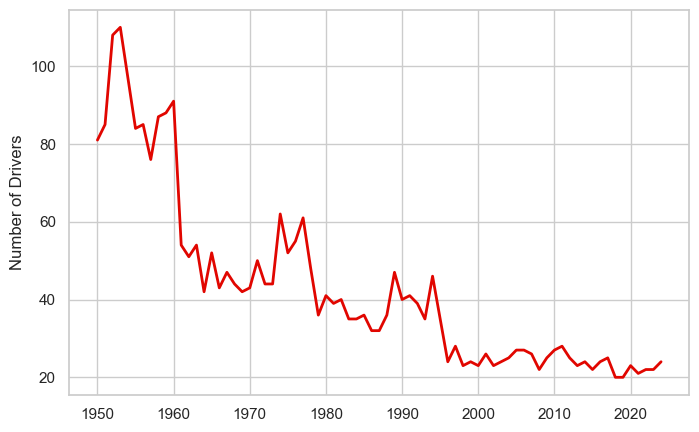

In [39]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT Season, COUNT(DISTINCT Driver) AS DriverCount
FROM RaceResults
GROUP BY Season
ORDER BY Season
"""

# Execute the query and fetch the data
driver_counts = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Seaborn plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(data=driver_counts, x='Season', y='DriverCount', color='#e10600', alpha=1, linewidth=2)
plt.title('')
plt.xlabel('')
plt.ylabel('Number of Drivers')
plt.xticks()
plt.yticks()
plt.savefig('charts/number_season_drivers.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
driver_counts.to_csv('results/number_season_drivers.csv', index=False)

# Data Visualization - Number of Constructors per Season

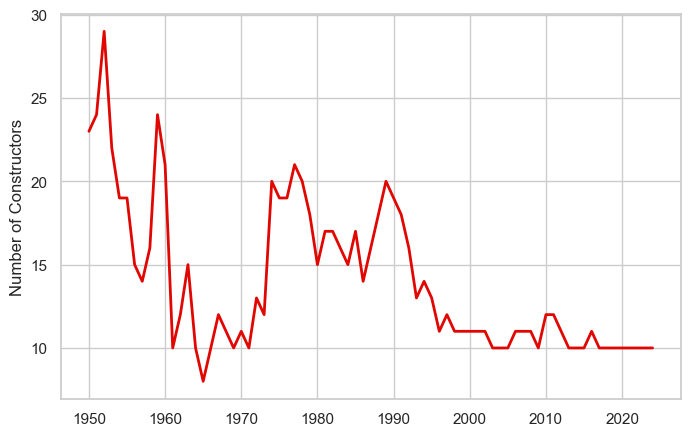

In [40]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT Season, COUNT(DISTINCT Constructor) AS ConstructorCount
FROM RaceResults
GROUP BY Season
ORDER BY Season
"""

# Execute the query and fetch the data
constructor_counts = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Seaborn plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(data=constructor_counts, x='Season', y='ConstructorCount', color='#e10600', alpha=1, linewidth=2)
plt.title('')
plt.xlabel('')
plt.ylabel('Number of Constructors')
plt.xticks()
plt.yticks()
plt.savefig('charts/number_season_constructors.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
constructor_counts.to_csv('results/number_season_constructors.csv', index=False)

# Data Visualization - Number of Engine Manufacturers per Season

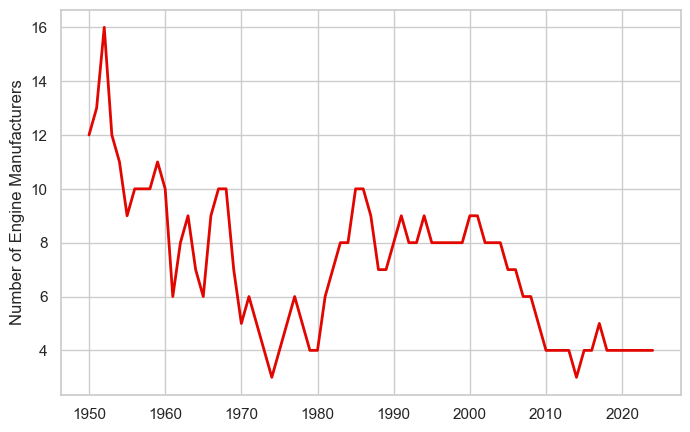

In [41]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT Season, COUNT(DISTINCT Engine) AS EngineManufacturerCount
FROM RaceResults
GROUP BY Season
ORDER BY Season
"""

# Execute the query and fetch the data
engine_manufacturer_counts = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Seaborn plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(data=engine_manufacturer_counts, x='Season', y='EngineManufacturerCount', color='#e10600', alpha=1, linewidth=2)
plt.title('')
plt.xlabel('')
plt.ylabel('Number of Engine Manufacturers')
plt.xticks()
plt.yticks()
plt.savefig('charts/number_season_engines.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
engine_manufacturer_counts.to_csv('results/number_season_engines.csv', index=False)

# Data Visualization - Number of Tyre Manufacturers per Season

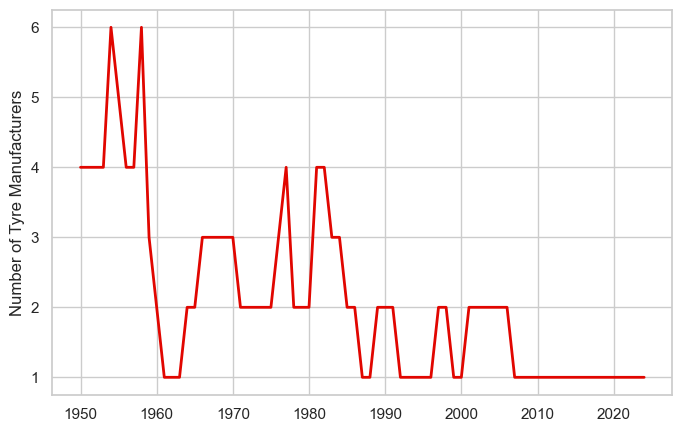

In [42]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT Season, COUNT(DISTINCT Tyre) AS TyreManufacturerCount
FROM RaceResults
GROUP BY Season
ORDER BY Season
"""

# Execute the query and fetch the data
tyre_manufacturer_counts = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Seaborn plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(data=tyre_manufacturer_counts, x='Season', y='TyreManufacturerCount', color='#e10600', alpha=1, linewidth=2)
plt.title('')
plt.xlabel('')
plt.ylabel('Number of Tyre Manufacturers')
plt.xticks()
plt.yticks()
plt.savefig('charts/number_season_tyres.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
tyre_manufacturer_counts.to_csv('results/number_season_tyres.csv', index=False)

# Data Visualization - Number of Rounds per Season

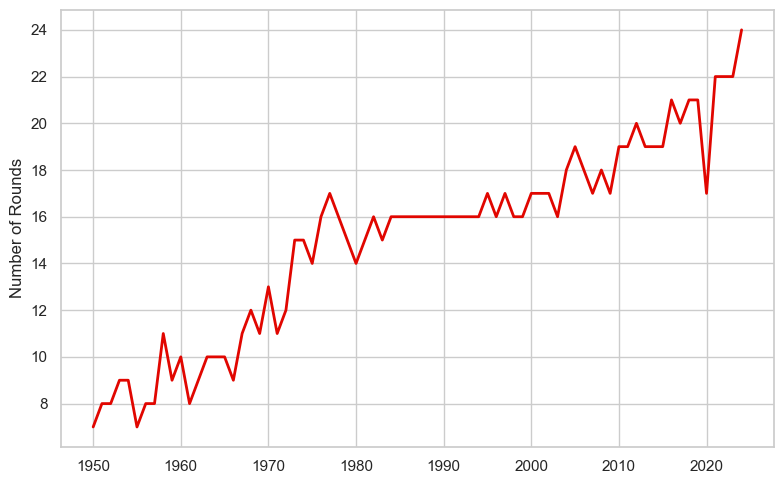

In [43]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT Season, COUNT(DISTINCT Round) AS RoundCount
FROM RaceResults
GROUP BY Season
ORDER BY Season
"""

# Execute the query and fetch the data
round_counts = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Seaborn plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(data=round_counts, x='Season', y='RoundCount', color='#e10600', alpha=1, linewidth=2)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
plt.title('')
plt.xlabel('')
plt.ylabel('Number of Rounds')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.savefig('charts/number_season_rounds.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
round_counts.to_csv('results/number_season_rounds.csv', index=False)

# Data Visualization - Visualizing Formula One Eras

Using Wikipedia as a reference, we define 12 distinct Formula One eras to visualize the evolution of the sport throughout its history. These eras are primarily characterized by changes in engine regulations, though aerodynamic and other regulations also play a significant role in some cases.

Below are the key traits defining each period:
- 1950-1957: Front-Engine / Factory Cars
- 1958-1961: Rear-Mid Engine / British Teams
- 1962-1967: 1.5L Engines / Anglophone Drivers
- 1968-1976: 12-Cylinder Engines / Sponsors / Safety / Aerodynamics
- 1977-1982: Ground-Effect
- 1983-1988: 1.5L Turbocharged Engines
- 1989-1994: 3.5L Naturally Aspirated Engines
- 1995-1999: 3L Engines
- 2000-2005: V10 Engines
- 2006-2013: 2.4L V8 Engines
- 2014-2021: 1.6L Turbocharged Engines
- 2022-2025: Ground-Effect / Aero Changes

*Further details about each era will be provided in the accompanying PDF file.*

In [44]:
# Define Formula One Eras
eras = {
    "1950-1957": {"start": 1950, "end": 1957},
    "1958-1961": {"start": 1958, "end": 1961},
    "1962-1967": {"start": 1962, "end": 1967},
    "1968-1976": {"start": 1968, "end": 1976},
    "1977-1982": {"start": 1977, "end": 1982},
    "1983-1988": {"start": 1983, "end": 1988},
    "1989-1994": {"start": 1989, "end": 1994},
    "1995-1999": {"start": 1995, "end": 1999},
    "2000-2005": {"start": 2000, "end": 2005},
    "2006-2013": {"start": 2006, "end": 2013},
    "2014-2021": {"start": 2014, "end": 2021},
    "2022-2025": {"start": 2022, "end": 2025}
}

# Data Visualization - Average Number of Drivers per Season for each Era

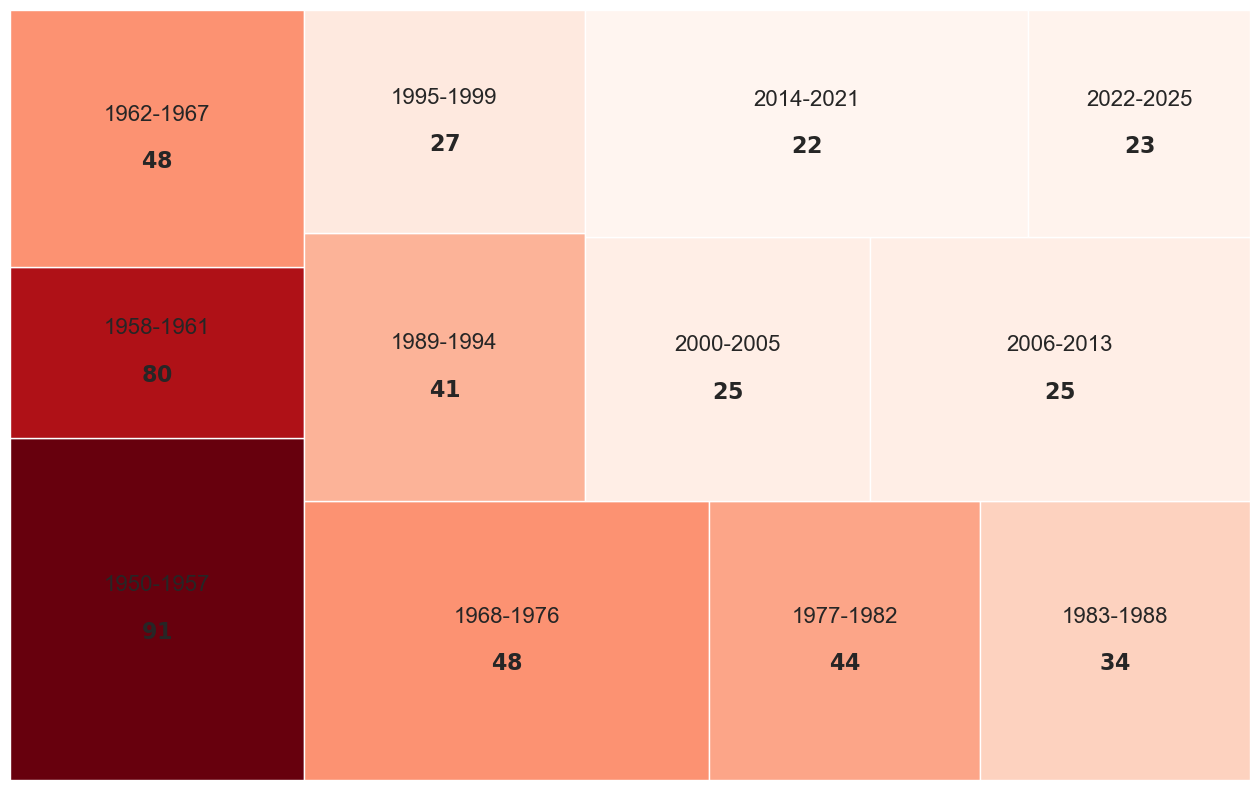

In [45]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query = """
SELECT Season, COUNT(DISTINCT Driver) AS DriverCount
FROM RaceResults
GROUP BY Season
ORDER BY Season
"""

# Execute the query and fetch the data
driver_counts = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Map seasons to eras and calculate average numbers
era_data = []
for era, details in eras.items():
    start, end = details["start"], details["end"]
    filtered = driver_counts[(driver_counts["Season"] >= start) & (driver_counts["Season"] <= end)]
    avg_drivers = round(filtered["DriverCount"].mean())
    era_data.append({"era": era, "years": end - start + 1, "avg_drivers": avg_drivers})

# Convert to DataFrame
era_df = pd.DataFrame(era_data)

# Treemap plot
plt.figure(figsize=(16, 10))
sizes = era_df["years"]
colors = era_df["avg_drivers"]
norm_colors = (colors - colors.min()) / (colors.max() - colors.min())
labels = [
    f"{row['era']}\n" + "\n" + r"$\mathbf{" + f"{row['avg_drivers']}" + "}$"
    for _, row in era_df.iterrows()
]
squarify.plot(
    sizes=sizes,
    label=labels,
    color=[plt.cm.Reds(norm) for norm in norm_colors],
    alpha=1,
    text_kwargs={'fontsize': 16}
)
plt.axis("off")
plt.title("")
plt.savefig('charts/era_drivers.png', format='png', dpi=500)
plt.show()

# Data Visualization - Average Number of Constructors per Season for each Era

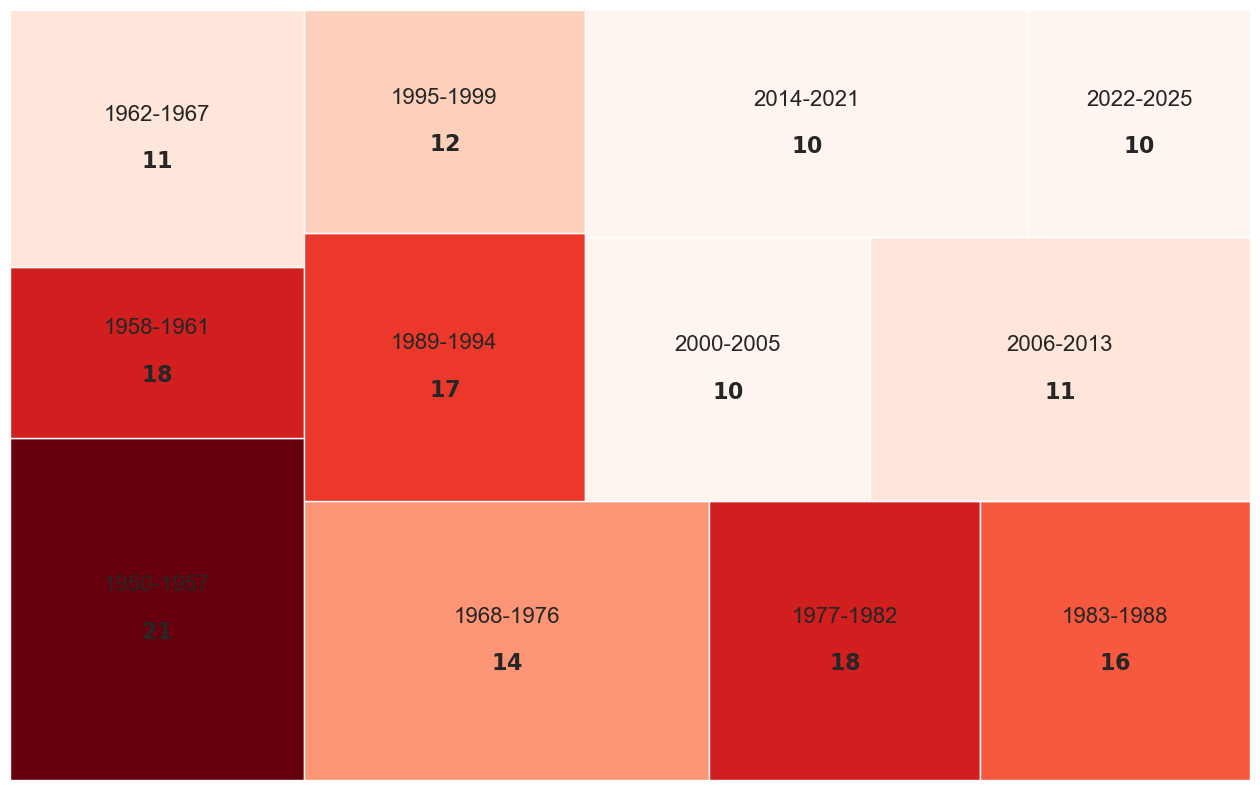

In [46]:
# SQL query
query = """
SELECT Season, COUNT(DISTINCT Constructor) AS ConstructorCount
FROM RaceResults
GROUP BY Season
ORDER BY Season
"""

# Connect to the SQLite database and fetch the data
conn = sqlite3.connect("formula one.db")
constructor_counts = pd.read_sql_query(query, conn)
conn.close()

# Map seasons to eras and calculate average numbers
era_data = []
for era, details in eras.items():
    start, end = details["start"], details["end"]
    filtered = constructor_counts[(constructor_counts["Season"] >= start) & (constructor_counts["Season"] <= end)]
    avg_constructors = round(filtered["ConstructorCount"].mean())
    era_data.append({"era": era, "years": end - start + 1, "avg_constructors": avg_constructors})

# Convert to DataFrame
era_df = pd.DataFrame(era_data)

# Treemap plot
plt.figure(figsize=(16, 10))
sizes = era_df["years"]
colors = era_df["avg_constructors"]
norm_colors = (colors - colors.min()) / (colors.max() - colors.min())
labels = [
    f"{row['era']}\n" + "\n" + r"$\mathbf{" + f"{row['avg_constructors']}" + "}$"
    for _, row in era_df.iterrows()
]
squarify.plot(
    sizes=sizes,
    label=labels,
    color=[plt.cm.Reds(norm) for norm in norm_colors],
    alpha=1,
    text_kwargs={'fontsize': 16}
)
plt.axis("off")
plt.title("")
plt.savefig('charts/era_constructors.png', format='png', dpi=500)
plt.show()

# Data Visualization - Average Number of Engine Manufacturers per Season for each Era

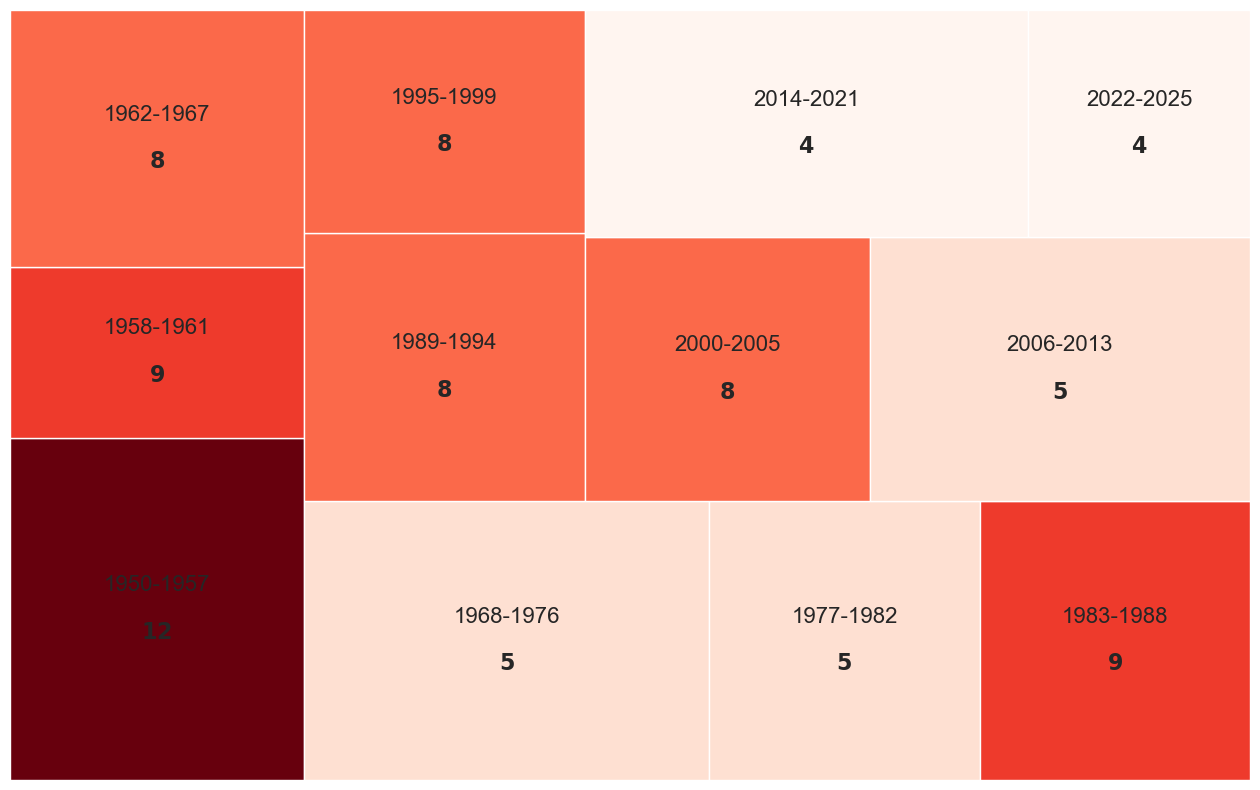

In [47]:
# SQL query
query = """
SELECT Season, COUNT(DISTINCT Engine) AS EngineManufacturerCount
FROM RaceResults
GROUP BY Season
ORDER BY Season
"""

# Connect to the SQLite database and fetch the data
conn = sqlite3.connect("formula one.db")
engine_counts = pd.read_sql_query(query, conn)
conn.close()

# Map seasons to eras and calculate average numbers
era_data = []
for era, details in eras.items():
    start, end = details["start"], details["end"]
    filtered = engine_counts[(engine_counts["Season"] >= start) & (engine_counts["Season"] <= end)]
    avg_engines = round(filtered["EngineManufacturerCount"].mean())
    era_data.append({"era": era, "years": end - start + 1, "avg_engines": avg_engines})

# Convert to DataFrame
era_df = pd.DataFrame(era_data)

# Treemap plot
plt.figure(figsize=(16, 10))
sizes = era_df["years"]
colors = era_df["avg_engines"]
norm_colors = (colors - colors.min()) / (colors.max() - colors.min())

labels = [
    f"{row['era']}\n" + "\n" + r"$\mathbf{" + f"{row['avg_engines']}" + "}$"
    for _, row in era_df.iterrows()
]
squarify.plot(
    sizes=sizes,
    label=labels,
    color=[plt.cm.Reds(norm) for norm in norm_colors],
    alpha=1,
    text_kwargs={'fontsize': 16}
)
plt.axis("off")
plt.title("")
plt.savefig('charts/era_engines.png', format='png', dpi=500)
plt.show()

# Data Visualization - Average Number of Tyre Manufacturers per Season for each Era

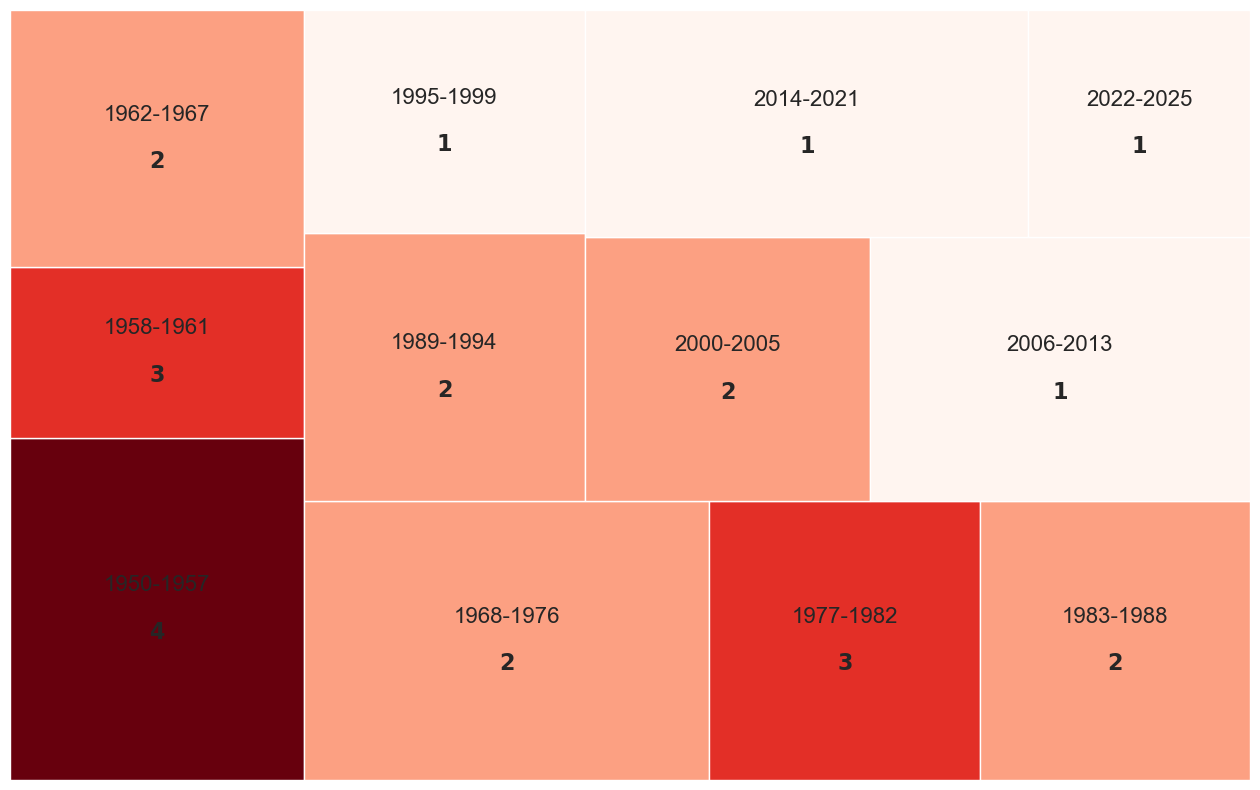

In [48]:
# SQL query
query = """
SELECT Season, COUNT(DISTINCT Tyre) AS TyreManufacturerCount
FROM RaceResults
GROUP BY Season
ORDER BY Season
"""

# Connect to the SQLite database and fetch the data
conn = sqlite3.connect("formula one.db")
tyre_counts = pd.read_sql_query(query, conn)
conn.close()

# Map seasons to eras and calculate average numbers
era_data = []
for era, details in eras.items():
    start, end = details["start"], details["end"]
    filtered = tyre_counts[(tyre_counts["Season"] >= start) & (tyre_counts["Season"] <= end)]
    avg_tyres = round(filtered["TyreManufacturerCount"].mean())
    era_data.append({"era": era, "years": end - start + 1, "avg_tyres": avg_tyres})

# Convert to DataFrame
era_df = pd.DataFrame(era_data)

# Treemap plot
plt.figure(figsize=(16, 10))
sizes = era_df["years"]
colors = era_df["avg_tyres"]
norm_colors = (colors - colors.min()) / (colors.max() - colors.min())
labels = [
    f"{row['era']}\n" + "\n" + r"$\mathbf{" + f"{row['avg_tyres']}" + "}$"
    for _, row in era_df.iterrows()
]
squarify.plot(
    sizes=sizes,
    label=labels,
    color=[plt.cm.Reds(norm) for norm in norm_colors],
    alpha=1,
    text_kwargs={'fontsize': 16}
)
plt.axis("off")
plt.title("")
plt.savefig('charts/era_tyres.png', format='png', dpi=500)
plt.show()

# Data Visualization - Average Number of Rounds per Season for each Era

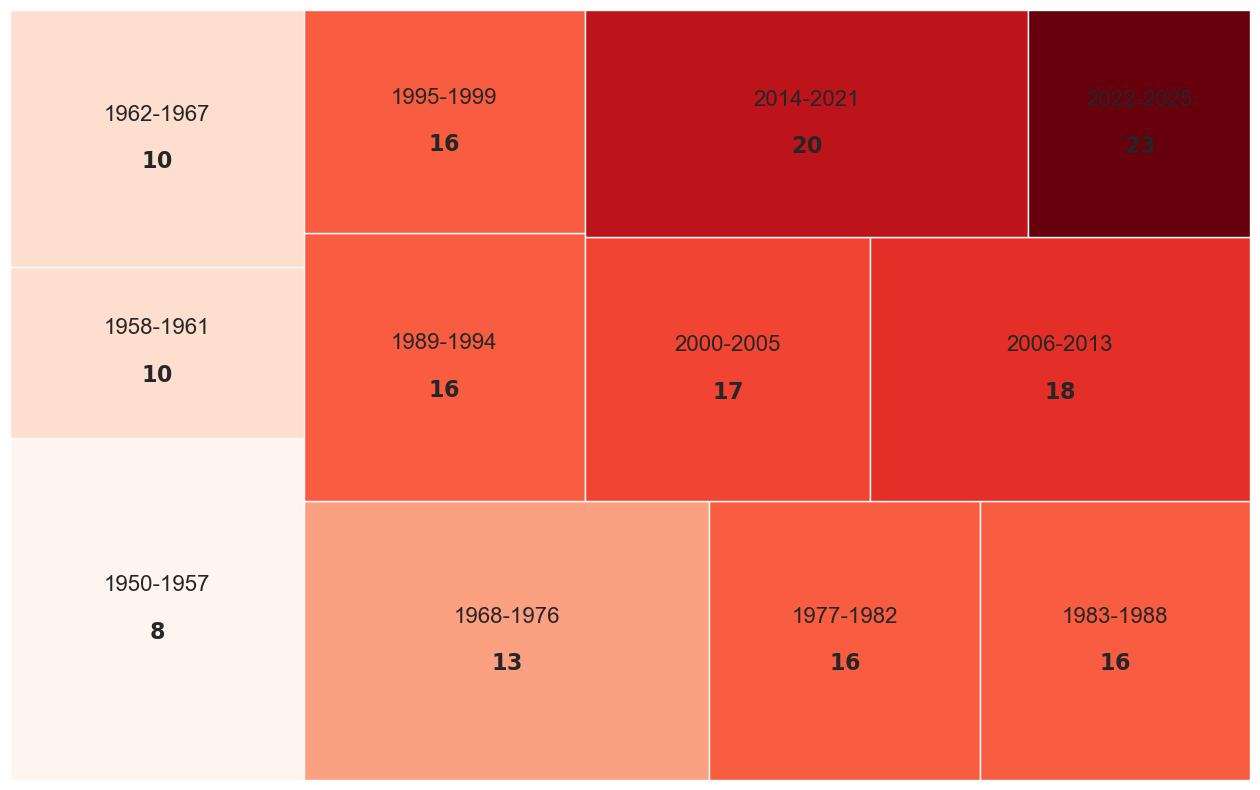

In [49]:
# SQL query
query = """
SELECT Season, COUNT(DISTINCT Round) AS RoundCount
FROM RaceResults
GROUP BY Season
ORDER BY Season
"""

# Connect to the SQLite database and fetch the data
conn = sqlite3.connect("formula one.db")
round_counts = pd.read_sql_query(query, conn)
conn.close()

# Map seasons to eras and calculate average numbers
era_data = []
for era, details in eras.items():
    start, end = details["start"], details["end"]
    filtered = round_counts[(round_counts["Season"] >= start) & (round_counts["Season"] <= end)]
    avg_rounds = round(filtered["RoundCount"].mean())
    era_data.append({"era": era, "years": end - start + 1, "avg_rounds": avg_rounds})

# Convert to DataFrame
era_df = pd.DataFrame(era_data)

# Treemap plot
plt.figure(figsize=(16, 10))
sizes = era_df["years"]
colors = era_df["avg_rounds"]
norm_colors = (colors - colors.min()) / (colors.max() - colors.min())
labels = [
    f"{row['era']}\n" + "\n" + r"$\mathbf{" + f"{row['avg_rounds']}" + "}$"
    for _, row in era_df.iterrows()
]
squarify.plot(
    sizes=sizes,
    label=labels,
    color=[plt.cm.Reds(norm) for norm in norm_colors],
    alpha=1,
    text_kwargs={'fontsize': 16}
)
plt.axis("off")
plt.title("")
plt.savefig('charts/era_rounds.png', format='png', dpi=500)
plt.show()

# Data Visualization - Overview of Drivers' F1 Careers

For the career overviews of F1 drivers, we use multi-set vertical bar charts. Colored bars represent the number of races won, podiums achieved, pole positions secured, and fastest laps set. Missing colored bars indicate no achievements for the respective metric in a given season.

Thicker grey bars represent the championship positions. These bars use an inverted axis with normalized heights: the tallest grey bars indicate 1st place, while the shortest bars correspond to the lowest championship positions.

Special cases include:
- Michael Schumacher was excluded from the 1997 championship, resulting in a missing grey bar for that season.
- Ayrton Senna tragically passed away in 1994, leading to a missing grey bar for that year.

# Data Visualization - Overview of Niki Lauda's F1 Career

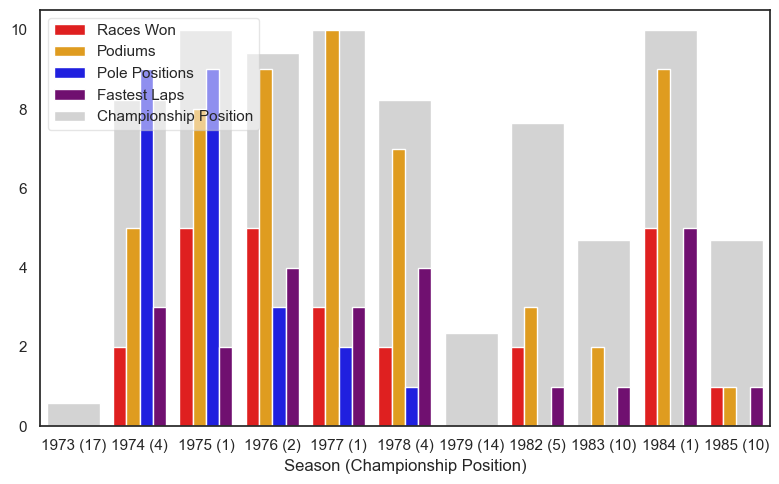

In [50]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query for championship position
query_championship = """
SELECT Season, MIN(Position) AS ChampionshipPosition
FROM DriverStandings
WHERE Driver = 'Niki Lauda'
GROUP BY Season
ORDER BY Season
"""

# SQL query for race wins
query_race_wins = """
SELECT Season, COUNT(*) AS RacesWon
FROM RaceResults
WHERE Driver = 'Niki Lauda' AND Position = 1
GROUP BY Season
ORDER BY Season
"""

# SQL query for podium finishes
query_podiums = """
SELECT Season, COUNT(*) AS Podiums
FROM RaceResults
WHERE Driver = 'Niki Lauda' AND Position IN (1, 2, 3)
GROUP BY Season
ORDER BY Season
"""

# SQL query for pole positions
query_poles = """
SELECT Season, COUNT(*) AS PolePositions
FROM QualifyingResults
WHERE Driver = 'Niki Lauda' AND Position = 1
GROUP BY Season
ORDER BY Season
"""

# SQL query for fastest laps
query_fastest_laps = """
SELECT Season, COUNT(*) AS FastestLaps
FROM FastestLaps
WHERE Driver = 'Niki Lauda'
GROUP BY Season
ORDER BY Season
"""

# Load the data
championship_data = pd.read_sql_query(query_championship, conn)
race_wins_data = pd.read_sql_query(query_race_wins, conn)
podiums_data = pd.read_sql_query(query_podiums, conn)
poles_data = pd.read_sql_query(query_poles, conn)
fastest_laps_data = pd.read_sql_query(query_fastest_laps, conn)

# Close the database connection
conn.close()

# Merge all data into a single DataFrame
performance_data = pd.merge(championship_data, race_wins_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, podiums_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, poles_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, fastest_laps_data, on='Season', how='outer')

# Fill missing values with 0 for statistics
performance_data.fillna(0, inplace=True)

# Convert Season to integer for proper plotting
performance_data['Season'] = performance_data['Season'].astype(int)

# Invert championship positions for bar height
max_championship_position = performance_data['ChampionshipPosition'].max()
performance_data['InvertedChampionshipPosition'] = max_championship_position - performance_data['ChampionshipPosition'] + 1

# Add championship position to the season labels
performance_data['SeasonLabel'] = performance_data.apply(
    lambda row: f"{int(row['Season'])} ({int(row['ChampionshipPosition'])})", axis=1
)

# Melt the DataFrame for easier plotting with Seaborn
melted_data = performance_data.melt(
    id_vars=['Season', 'SeasonLabel'],
    value_vars=['RacesWon', 'Podiums', 'PolePositions', 'FastestLaps'],
    var_name='Metric',
    value_name='Value'
)

# Rename metrics for display
metric_labels = {
    'RacesWon': 'Races Won',
    'Podiums': 'Podiums',
    'PolePositions': 'Pole Positions',
    'FastestLaps': 'Fastest Laps'
}
melted_data['Metric'] = melted_data['Metric'].map(metric_labels)

# Define colors for the metrics
metric_colors = {
    'Races Won': 'red',
    'Podiums': 'orange',
    'Pole Positions': 'blue',
    'Fastest Laps': 'purple'
}

# Handle null or zero championship positions
performance_data['InvertedChampionshipPosition'] = performance_data['ChampionshipPosition'].apply(
    lambda pos: max_championship_position - pos + 1 if pos > 0 else 0
)

# Correct the height of the championship position bars
max_metric_value = performance_data[['RacesWon', 'Podiums', 'PolePositions', 'FastestLaps']].max().max()
performance_data['ScaledInvertedChampionshipPosition'] = (
    performance_data['InvertedChampionshipPosition'] * (max_metric_value / max_championship_position)
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    data=performance_data,
    x='SeasonLabel',
    y='ScaledInvertedChampionshipPosition',
    color='lightgrey',
    label='Championship Position'
)
sns.barplot(
    data=melted_data,
    x='SeasonLabel',
    y='Value',
    hue='Metric',
    palette=metric_colors
)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
plt.title("")
plt.xlabel('Season (Championship Position)')
plt.ylabel('')
plt.xticks(rotation=0)
plt.legend(loc='upper left', framealpha=0.5)
plt.tight_layout()
plt.savefig('charts/overview_niki_lauda.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
performance_data.to_csv("results/overview_niki_lauda.csv")

# Data Visualization - Overview of Ayrton Senna's F1 Career

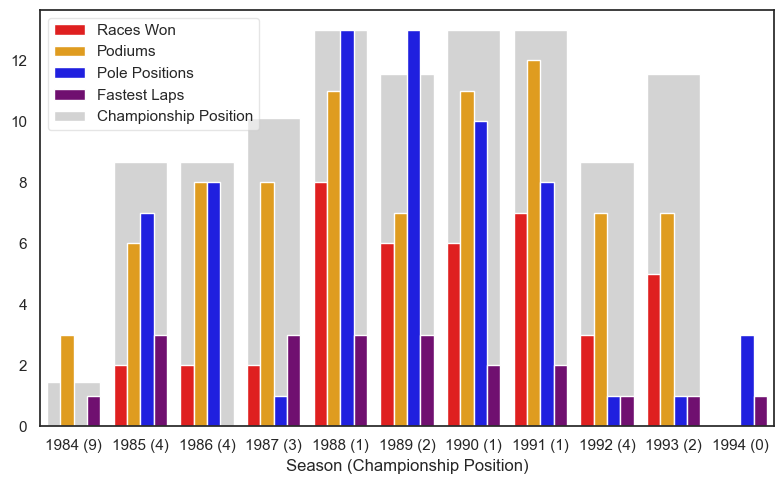

In [51]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query for championship position
query_championship = """
SELECT Season, MIN(Position) AS ChampionshipPosition
FROM DriverStandings
WHERE Driver = 'Ayrton Senna'
GROUP BY Season
ORDER BY Season
"""

# SQL query for race wins
query_race_wins = """
SELECT Season, COUNT(*) AS RacesWon
FROM RaceResults
WHERE Driver = 'Ayrton Senna' AND Position = 1
GROUP BY Season
ORDER BY Season
"""

# SQL query for podium finishes
query_podiums = """
SELECT Season, COUNT(*) AS Podiums
FROM RaceResults
WHERE Driver = 'Ayrton Senna' AND Position IN (1, 2, 3)
GROUP BY Season
ORDER BY Season
"""

# SQL query for pole positions
query_poles = """
SELECT Season, COUNT(*) AS PolePositions
FROM QualifyingResults
WHERE Driver = 'Ayrton Senna' AND Position = 1
GROUP BY Season
ORDER BY Season
"""

# SQL query for fastest laps
query_fastest_laps = """
SELECT Season, COUNT(*) AS FastestLaps
FROM FastestLaps
WHERE Driver = 'Ayrton Senna'
GROUP BY Season
ORDER BY Season
"""

# Load the data
championship_data = pd.read_sql_query(query_championship, conn)
race_wins_data = pd.read_sql_query(query_race_wins, conn)
podiums_data = pd.read_sql_query(query_podiums, conn)
poles_data = pd.read_sql_query(query_poles, conn)
fastest_laps_data = pd.read_sql_query(query_fastest_laps, conn)

# Close the database connection
conn.close()

# Merge all data into a single DataFrame
performance_data = pd.merge(championship_data, race_wins_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, podiums_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, poles_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, fastest_laps_data, on='Season', how='outer')

# Fill missing values with 0 for statistics
performance_data.fillna(0, inplace=True)

# Convert Season to integer for proper plotting
performance_data['Season'] = performance_data['Season'].astype(int)

# Invert championship positions for bar height
max_championship_position = performance_data['ChampionshipPosition'].max()
performance_data['InvertedChampionshipPosition'] = max_championship_position - performance_data['ChampionshipPosition'] + 1

# Add championship position to the season labels
performance_data['SeasonLabel'] = performance_data.apply(
    lambda row: f"{int(row['Season'])} ({int(row['ChampionshipPosition'])})", axis=1
)

# Melt the DataFrame for easier plotting with Seaborn
melted_data = performance_data.melt(
    id_vars=['Season', 'SeasonLabel'],
    value_vars=['RacesWon', 'Podiums', 'PolePositions', 'FastestLaps'],
    var_name='Metric',
    value_name='Value'
)

# Rename metrics for display
metric_labels = {
    'RacesWon': 'Races Won',
    'Podiums': 'Podiums',
    'PolePositions': 'Pole Positions',
    'FastestLaps': 'Fastest Laps'
}
melted_data['Metric'] = melted_data['Metric'].map(metric_labels)

# Define colors for the metrics
metric_colors = {
    'Races Won': 'red',
    'Podiums': 'orange',
    'Pole Positions': 'blue',
    'Fastest Laps': 'purple'
}

# Handle null or zero championship positions
performance_data['InvertedChampionshipPosition'] = performance_data['ChampionshipPosition'].apply(
    lambda pos: max_championship_position - pos + 1 if pos > 0 else 0
)

# Correct the height of the championship position bars
max_metric_value = performance_data[['RacesWon', 'Podiums', 'PolePositions', 'FastestLaps']].max().max()
performance_data['ScaledInvertedChampionshipPosition'] = (
    performance_data['InvertedChampionshipPosition'] * (max_metric_value / max_championship_position)
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    data=performance_data,
    x='SeasonLabel',
    y='ScaledInvertedChampionshipPosition',
    color='lightgrey',
    label='Championship Position'
)
sns.barplot(
    data=melted_data,
    x='SeasonLabel',
    y='Value',
    hue='Metric',
    palette=metric_colors
)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
plt.title("")
plt.xlabel('Season (Championship Position)')
plt.ylabel('')
plt.xticks(rotation=0)
plt.legend(loc='upper left', framealpha=0.5)
plt.tight_layout()
plt.savefig('charts/overview_ayrton_senna.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
performance_data.to_csv("results/overview_ayrton_senna.csv")

# Data Visualization - Overview of Michael Schumacher's F1 Career

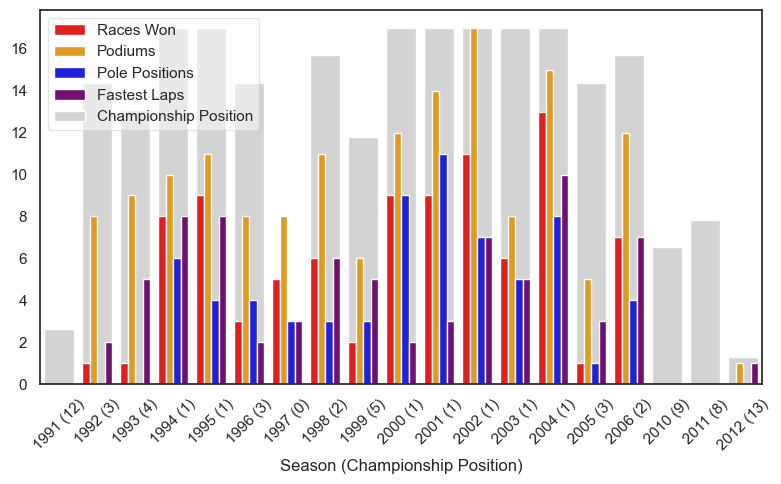

In [52]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query for championship position
query_championship = """
SELECT Season, MIN(Position) AS ChampionshipPosition
FROM DriverStandings
WHERE Driver = 'Michael Schumacher'
GROUP BY Season
ORDER BY Season
"""

# SQL query for race wins
query_race_wins = """
SELECT Season, COUNT(*) AS RacesWon
FROM RaceResults
WHERE Driver = 'Michael Schumacher' AND Position = 1
GROUP BY Season
ORDER BY Season
"""

# SQL query for podium finishes
query_podiums = """
SELECT Season, COUNT(*) AS Podiums
FROM RaceResults
WHERE Driver = 'Michael Schumacher' AND Position IN (1, 2, 3)
GROUP BY Season
ORDER BY Season
"""

# SQL query for pole positions
query_poles = """
SELECT Season, COUNT(*) AS PolePositions
FROM QualifyingResults
WHERE Driver = 'Michael Schumacher' AND Position = 1
GROUP BY Season
ORDER BY Season
"""

# SQL query for fastest laps
query_fastest_laps = """
SELECT Season, COUNT(*) AS FastestLaps
FROM FastestLaps
WHERE Driver = 'Michael Schumacher'
GROUP BY Season
ORDER BY Season
"""

# Load the data
championship_data = pd.read_sql_query(query_championship, conn)
race_wins_data = pd.read_sql_query(query_race_wins, conn)
podiums_data = pd.read_sql_query(query_podiums, conn)
poles_data = pd.read_sql_query(query_poles, conn)
fastest_laps_data = pd.read_sql_query(query_fastest_laps, conn)

# Close the database connection
conn.close()

# Merge all data into a single DataFrame
performance_data = pd.merge(championship_data, race_wins_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, podiums_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, poles_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, fastest_laps_data, on='Season', how='outer')

# Fill missing values with 0 for statistics
performance_data.fillna(0, inplace=True)

# Convert Season to integer for proper plotting
performance_data['Season'] = performance_data['Season'].astype(int)

# Invert championship positions for bar height
max_championship_position = performance_data['ChampionshipPosition'].max()
performance_data['InvertedChampionshipPosition'] = max_championship_position - performance_data['ChampionshipPosition'] + 1

# Add championship position to the season labels
performance_data['SeasonLabel'] = performance_data.apply(
    lambda row: f"{int(row['Season'])} ({int(row['ChampionshipPosition'])})", axis=1
)

# Melt the DataFrame for easier plotting with Seaborn
melted_data = performance_data.melt(
    id_vars=['Season', 'SeasonLabel'],
    value_vars=['RacesWon', 'Podiums', 'PolePositions', 'FastestLaps'],
    var_name='Metric',
    value_name='Value'
)

# Rename metrics for display
metric_labels = {
    'RacesWon': 'Races Won',
    'Podiums': 'Podiums',
    'PolePositions': 'Pole Positions',
    'FastestLaps': 'Fastest Laps'
}
melted_data['Metric'] = melted_data['Metric'].map(metric_labels)

# Define colors for the metrics
metric_colors = {
    'Races Won': 'red',
    'Podiums': 'orange',
    'Pole Positions': 'blue',
    'Fastest Laps': 'purple'
}

# Handle null or zero championship positions
performance_data['InvertedChampionshipPosition'] = performance_data['ChampionshipPosition'].apply(
    lambda pos: max_championship_position - pos + 1 if pos > 0 else 0
)

# Correct the height of the championship position bars
max_metric_value = performance_data[['RacesWon', 'Podiums', 'PolePositions', 'FastestLaps']].max().max()
performance_data['ScaledInvertedChampionshipPosition'] = (
    performance_data['InvertedChampionshipPosition'] * (max_metric_value / max_championship_position)
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    data=performance_data,
    x='SeasonLabel',
    y='ScaledInvertedChampionshipPosition',
    color='lightgrey',
    label='Championship Position'
)
sns.barplot(
    data=melted_data,
    x='SeasonLabel',
    y='Value',
    hue='Metric',
    palette=metric_colors
)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
plt.title("")
plt.xlabel('Season (Championship Position)')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(loc='upper left', framealpha=0.5)
plt.tight_layout()
plt.savefig('charts/overview_michael_schumacher.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
performance_data.to_csv("results/overview_michael_schumacher.csv")

# Data Visualization - Overview of Lewis Hamilton's F1 Career

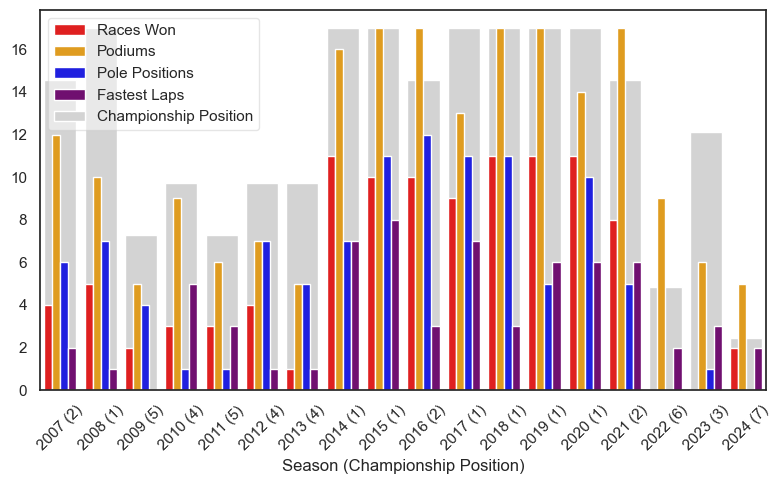

In [53]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query for championship position
query_championship = """
SELECT Season, MIN(Position) AS ChampionshipPosition
FROM DriverStandings
WHERE Driver = 'Lewis Hamilton'
GROUP BY Season
ORDER BY Season
"""

# SQL query for race wins
query_race_wins = """
SELECT Season, COUNT(*) AS RacesWon
FROM RaceResults
WHERE Driver = 'Lewis Hamilton' AND Position = 1
GROUP BY Season
ORDER BY Season
"""

# SQL query for podium finishes
query_podiums = """
SELECT Season, COUNT(*) AS Podiums
FROM RaceResults
WHERE Driver = 'Lewis Hamilton' AND Position IN (1, 2, 3)
GROUP BY Season
ORDER BY Season
"""

# SQL query for pole positions
query_poles = """
SELECT Season, COUNT(*) AS PolePositions
FROM QualifyingResults
WHERE Driver = 'Lewis Hamilton' AND Position = 1
GROUP BY Season
ORDER BY Season
"""

# SQL query for fastest laps
query_fastest_laps = """
SELECT Season, COUNT(*) AS FastestLaps
FROM FastestLaps
WHERE Driver = 'Lewis Hamilton'
GROUP BY Season
ORDER BY Season
"""

# Load the data
championship_data = pd.read_sql_query(query_championship, conn)
race_wins_data = pd.read_sql_query(query_race_wins, conn)
podiums_data = pd.read_sql_query(query_podiums, conn)
poles_data = pd.read_sql_query(query_poles, conn)
fastest_laps_data = pd.read_sql_query(query_fastest_laps, conn)

# Close the database connection
conn.close()

# Merge all data into a single DataFrame
performance_data = pd.merge(championship_data, race_wins_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, podiums_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, poles_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, fastest_laps_data, on='Season', how='outer')

# Fill missing values with 0 for statistics
performance_data.fillna(0, inplace=True)

# Convert Season to integer for proper plotting
performance_data['Season'] = performance_data['Season'].astype(int)

# Invert championship positions for bar height
max_championship_position = performance_data['ChampionshipPosition'].max()
performance_data['InvertedChampionshipPosition'] = max_championship_position - performance_data['ChampionshipPosition'] + 1

# Add championship position to the season labels
performance_data['SeasonLabel'] = performance_data.apply(
    lambda row: f"{int(row['Season'])} ({int(row['ChampionshipPosition'])})", axis=1
)

# Melt the DataFrame for easier plotting with Seaborn
melted_data = performance_data.melt(
    id_vars=['Season', 'SeasonLabel'],
    value_vars=['RacesWon', 'Podiums', 'PolePositions', 'FastestLaps'],
    var_name='Metric',
    value_name='Value'
)

# Rename metrics for display
metric_labels = {
    'RacesWon': 'Races Won',
    'Podiums': 'Podiums',
    'PolePositions': 'Pole Positions',
    'FastestLaps': 'Fastest Laps'
}
melted_data['Metric'] = melted_data['Metric'].map(metric_labels)

# Define colors for the metrics
metric_colors = {
    'Races Won': 'red',
    'Podiums': 'orange',
    'Pole Positions': 'blue',
    'Fastest Laps': 'purple'
}

# Handle null or zero championship positions
performance_data['InvertedChampionshipPosition'] = performance_data['ChampionshipPosition'].apply(
    lambda pos: max_championship_position - pos + 1 if pos > 0 else 0
)

# Correct the height of the championship position bars
max_metric_value = performance_data[['RacesWon', 'Podiums', 'PolePositions', 'FastestLaps']].max().max()
performance_data['ScaledInvertedChampionshipPosition'] = (
    performance_data['InvertedChampionshipPosition'] * (max_metric_value / max_championship_position)
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    data=performance_data,
    x='SeasonLabel',
    y='ScaledInvertedChampionshipPosition',
    color='lightgrey',
    label='Championship Position'
)
sns.barplot(
    data=melted_data,
    x='SeasonLabel',
    y='Value',
    hue='Metric',
    palette=metric_colors
)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
plt.title("")
plt.xlabel('Season (Championship Position)')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(loc='upper left', framealpha=0.5)
plt.tight_layout()
plt.savefig('charts/overview_lewis_hamilton.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
performance_data.to_csv("results/overview_lewis_hamilton.csv")

# Data Visualization - Overview of Max Verstappen's F1 Career

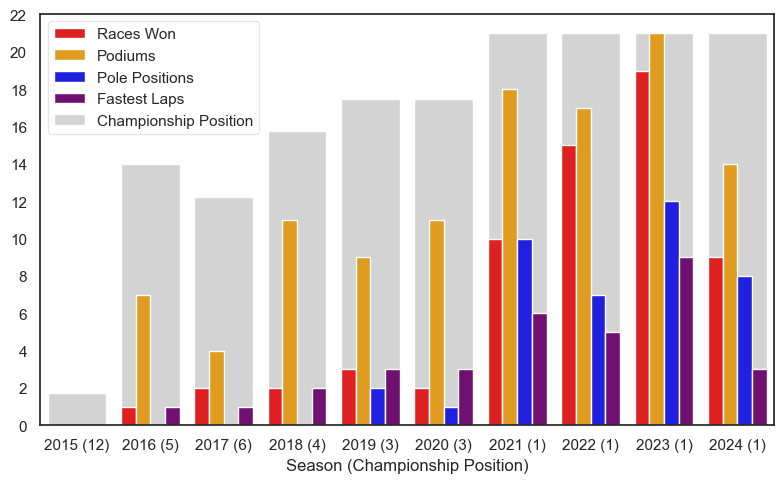

In [54]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query for championship position
query_championship = """
SELECT Season, MIN(Position) AS ChampionshipPosition
FROM DriverStandings
WHERE Driver = 'Max Verstappen'
GROUP BY Season
ORDER BY Season
"""

# SQL query for race wins
query_race_wins = """
SELECT Season, COUNT(*) AS RacesWon
FROM RaceResults
WHERE Driver = 'Max Verstappen' AND Position = 1
GROUP BY Season
ORDER BY Season
"""

# SQL query for podium finishes
query_podiums = """
SELECT Season, COUNT(*) AS Podiums
FROM RaceResults
WHERE Driver = 'Max Verstappen' AND Position IN (1, 2, 3)
GROUP BY Season
ORDER BY Season
"""

# SQL query for pole positions
query_poles = """
SELECT Season, COUNT(*) AS PolePositions
FROM QualifyingResults
WHERE Driver = 'Max Verstappen' AND Position = 1
GROUP BY Season
ORDER BY Season
"""

# SQL query for fastest laps
query_fastest_laps = """
SELECT Season, COUNT(*) AS FastestLaps
FROM FastestLaps
WHERE Driver = 'Max Verstappen'
GROUP BY Season
ORDER BY Season
"""

# Load the data
championship_data = pd.read_sql_query(query_championship, conn)
race_wins_data = pd.read_sql_query(query_race_wins, conn)
podiums_data = pd.read_sql_query(query_podiums, conn)
poles_data = pd.read_sql_query(query_poles, conn)
fastest_laps_data = pd.read_sql_query(query_fastest_laps, conn)

# Close the database connection
conn.close()

# Merge all data into a single DataFrame
performance_data = pd.merge(championship_data, race_wins_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, podiums_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, poles_data, on='Season', how='outer')
performance_data = pd.merge(performance_data, fastest_laps_data, on='Season', how='outer')

# Fill missing values with 0 for statistics
performance_data.fillna(0, inplace=True)

# Convert Season to integer for proper plotting
performance_data['Season'] = performance_data['Season'].astype(int)

# Invert championship positions for bar height
max_championship_position = performance_data['ChampionshipPosition'].max()
performance_data['InvertedChampionshipPosition'] = max_championship_position - performance_data['ChampionshipPosition'] + 1

# Add championship position to the season labels
performance_data['SeasonLabel'] = performance_data.apply(
    lambda row: f"{int(row['Season'])} ({int(row['ChampionshipPosition'])})", axis=1
)

# Melt the DataFrame for easier plotting with Seaborn
melted_data = performance_data.melt(
    id_vars=['Season', 'SeasonLabel'],
    value_vars=['RacesWon', 'Podiums', 'PolePositions', 'FastestLaps'],
    var_name='Metric',
    value_name='Value'
)

# Rename metrics for display
metric_labels = {
    'RacesWon': 'Races Won',
    'Podiums': 'Podiums',
    'PolePositions': 'Pole Positions',
    'FastestLaps': 'Fastest Laps'
}
melted_data['Metric'] = melted_data['Metric'].map(metric_labels)

# Define colors for the metrics
metric_colors = {
    'Races Won': 'red',
    'Podiums': 'orange',
    'Pole Positions': 'blue',
    'Fastest Laps': 'purple'
}

# Handle null or zero championship positions
performance_data['InvertedChampionshipPosition'] = performance_data['ChampionshipPosition'].apply(
    lambda pos: max_championship_position - pos + 1 if pos > 0 else 0
)

# Correct the height of the championship position bars
max_metric_value = performance_data[['RacesWon', 'Podiums', 'PolePositions', 'FastestLaps']].max().max()
performance_data['ScaledInvertedChampionshipPosition'] = (
    performance_data['InvertedChampionshipPosition'] * (max_metric_value / max_championship_position)
)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.set_theme(style="white")
sns.barplot(
    data=performance_data,
    x='SeasonLabel',
    y='ScaledInvertedChampionshipPosition',
    color='lightgrey',
    label='Championship Position'
)
sns.barplot(
    data=melted_data,
    x='SeasonLabel',
    y='Value',
    hue='Metric',
    palette=metric_colors
)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
plt.title("")
plt.xlabel('Season (Championship Position)')
plt.ylabel('')
plt.xticks(rotation=0)
plt.legend(loc='upper left', framealpha=0.5)
plt.tight_layout()
plt.savefig('charts/overview_max_verstappen.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
performance_data.to_csv("results/overview_max_verstappen.csv")

# Data Visualization - Overview of Constructor's Championship Results

For constructors, we focus on an overview of championship positions, represented using line charts. 

To provide a clearer representation, especially for older teams that have participated since the 1950s, 1960s, or 1970s, we use the *step* variable to adjust the granularity of data points. This adjustment ensures the chart remains readable while reflecting long-term trends effectively.

# Data Visualization - Overview of Ferrari's Championship Results

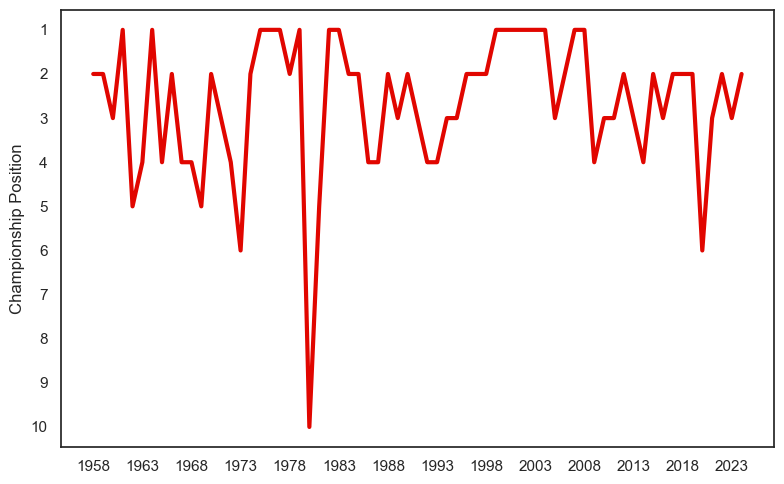

In [55]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query_championship = """
SELECT Season, MIN(Position) AS ChampionshipPosition
FROM ConstructorStandings
WHERE Constructor = 'Ferrari'
GROUP BY Season
ORDER BY Season
"""

# Execute the query and fetch the data
ferrari_championship_data = pd.read_sql_query(query_championship, conn)

# Close the database connection
conn.close()

# Seaborn plot
sns.set_theme(style="white")
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=ferrari_championship_data,
    x='Season',
    y='ChampionshipPosition',
    color='#e10600',
    alpha=1,
    linewidth=3
)
plt.gca().invert_yaxis()
step = 5
plt.xticks(
    ticks=range(ferrari_championship_data['Season'].min(), ferrari_championship_data['Season'].max() + 1, step),
    labels=range(ferrari_championship_data['Season'].min(), ferrari_championship_data['Season'].max() + 1, step)
)
plt.yticks(range(1, int(ferrari_championship_data['ChampionshipPosition'].max()) + 1, 1))
plt.title("")
plt.xlabel('')
plt.ylabel('Championship Position')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.savefig('charts/overview_ferrari.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
ferrari_championship_data.to_csv("results/overview_ferrari.csv")

# Data Visualization - Overview of McLaren's Championship Results

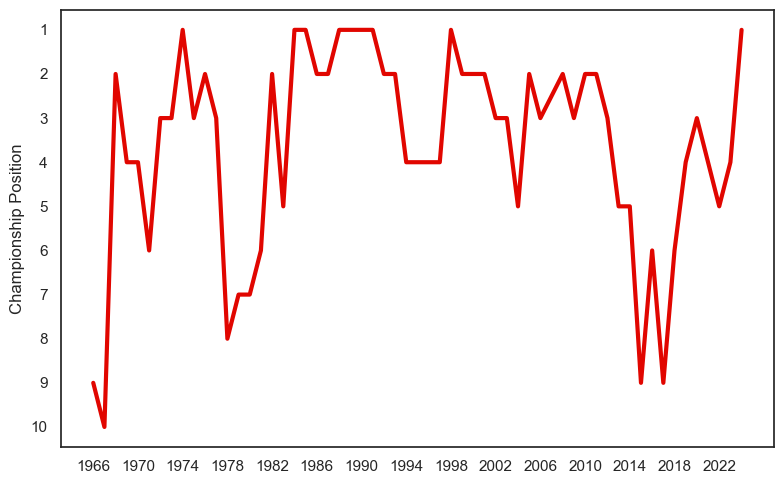

In [56]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query_championship = """
SELECT Season, MIN(Position) AS ChampionshipPosition
FROM ConstructorStandings
WHERE Constructor = 'McLaren'
GROUP BY Season
ORDER BY Season
"""

# Execute the query and fetch the data
mclaren_championship_data = pd.read_sql_query(query_championship, conn)

# Close the database connection
conn.close()

# Plotting the data
sns.set_theme(style="white")
plt.figure(figsize=(8, 5))

sns.lineplot(
    data=mclaren_championship_data,
    x='Season',
    y='ChampionshipPosition',
    color='#e10600',
    alpha=1,
    linewidth=3
)

# Seaborn plot
plt.gca().invert_yaxis()
step = 4
plt.xticks(
    ticks=range(mclaren_championship_data['Season'].min(), mclaren_championship_data['Season'].max() + 1, step),
    labels=range(mclaren_championship_data['Season'].min(), mclaren_championship_data['Season'].max() + 1, step)
)
plt.yticks(range(1, int(mclaren_championship_data['ChampionshipPosition'].max()) + 1, 1))
plt.title("")
plt.xlabel('')
plt.ylabel('Championship Position')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.savefig('charts/overview_mclaren.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
mclaren_championship_data.to_csv("results/overview_mclaren.csv")

# Data Visualization - Overview of Williams' Championship Results

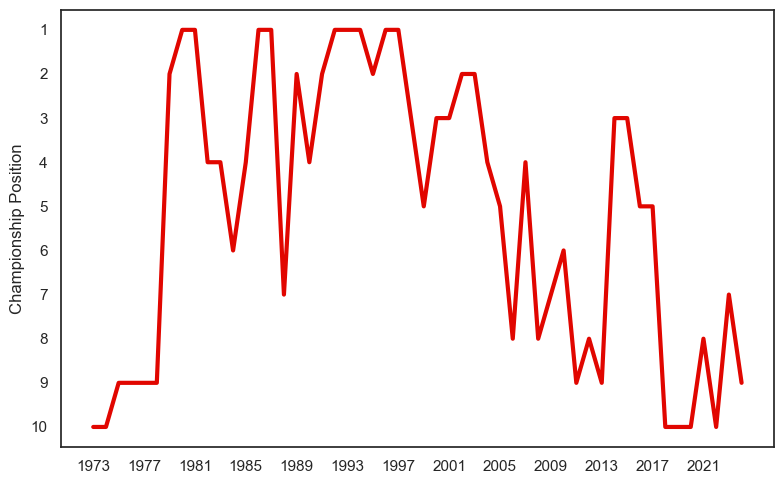

In [57]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query_championship = """
SELECT Season, MIN(Position) AS ChampionshipPosition
FROM ConstructorStandings
WHERE Constructor = 'Williams'
GROUP BY Season
ORDER BY Season
"""

# Execute the query and fetch the data
williams_championship_data = pd.read_sql_query(query_championship, conn)

# Close the database connection
conn.close()

# Seaborn plot
sns.set_theme(style="white")
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=williams_championship_data,
    x='Season',
    y='ChampionshipPosition',
    color='#e10600',
    alpha=1,
    linewidth=3
)
plt.gca().invert_yaxis()
step = 4
plt.xticks(
    ticks=range(williams_championship_data['Season'].min(), williams_championship_data['Season'].max() + 1, step),
    labels=range(williams_championship_data['Season'].min(), williams_championship_data['Season'].max() + 1, step)
)
plt.yticks(range(1, int(williams_championship_data['ChampionshipPosition'].max()) + 1, 1))
plt.title("")
plt.xlabel('')
plt.ylabel('Championship Position')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.savefig('charts/overview_williams.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
williams_championship_data.to_csv("results/overview_williams.csv")

# Data Visualization - Overview of Red Bull's Championship Results

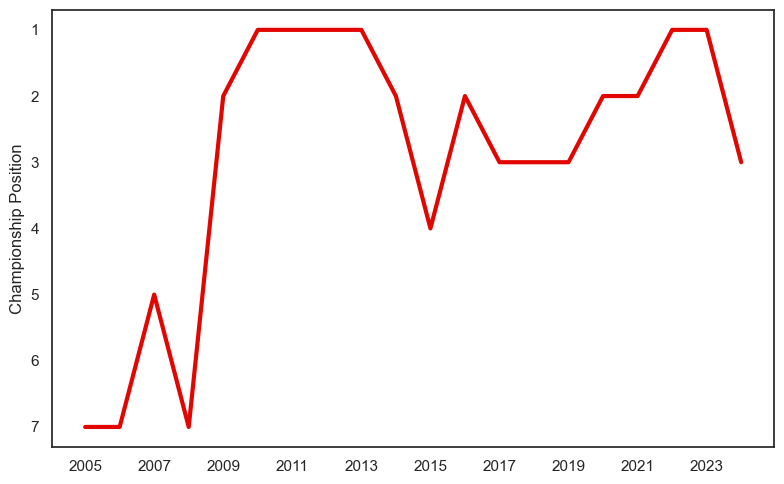

In [58]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query_championship = """
SELECT Season, MIN(Position) AS ChampionshipPosition
FROM ConstructorStandings
WHERE Constructor = 'Red Bull'
GROUP BY Season
ORDER BY Season
"""

# Execute the query and fetch the data
red_bull_championship_data = pd.read_sql_query(query_championship, conn)

# Close the database connection
conn.close()

# Seaborn plot
sns.set_theme(style="white")
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=red_bull_championship_data,
    x='Season',
    y='ChampionshipPosition',
    color='#e10600',
    alpha=1,
    linewidth=3
)
plt.gca().invert_yaxis()
step = 2
plt.xticks(
    ticks=range(red_bull_championship_data['Season'].min(), red_bull_championship_data['Season'].max() + 1, step),
    labels=range(red_bull_championship_data['Season'].min(), red_bull_championship_data['Season'].max() + 1, step)
)
plt.yticks(range(1, int(red_bull_championship_data['ChampionshipPosition'].max()) + 1, 1))
plt.title("")
plt.xlabel('')
plt.ylabel('Championship Position')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.savefig('charts/overview_red_bull.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
red_bull_championship_data.to_csv("results/overview_red_bull.csv")

# Data Visualization - Overview of Mercedes' Championship Results

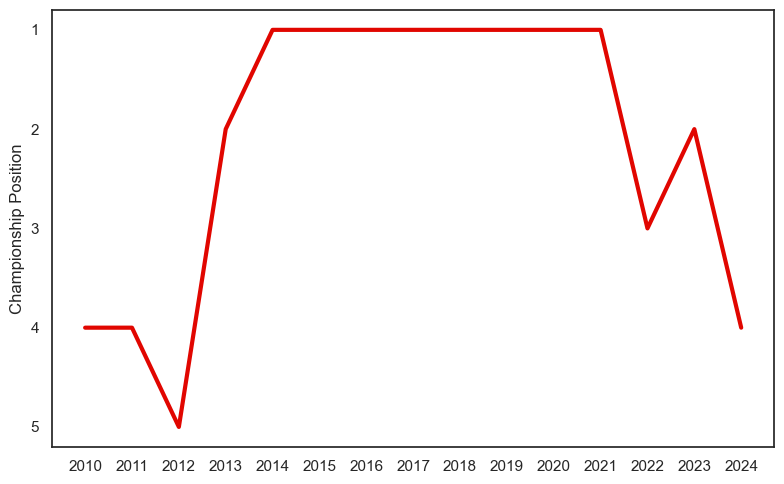

In [59]:
# Connect to the SQLite database
conn = sqlite3.connect("formula one.db")

# SQL query
query_championship = """
SELECT Season, MIN(Position) AS ChampionshipPosition
FROM ConstructorStandings
WHERE Constructor = 'Mercedes'
GROUP BY Season
ORDER BY Season
"""

# Execute the query and fetch the data
mercedes_championship_data = pd.read_sql_query(query_championship, conn)

# Close the database connection
conn.close()

# Seaborn plot
sns.set_theme(style="white")
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=mercedes_championship_data,
    x='Season',
    y='ChampionshipPosition',
    color='#e10600',
    alpha=1,
    linewidth=3
)
plt.gca().invert_yaxis()
step = 1
plt.xticks(
    ticks=range(mercedes_championship_data['Season'].min(), mercedes_championship_data['Season'].max() + 1, step),
    labels=range(mercedes_championship_data['Season'].min(), mercedes_championship_data['Season'].max() + 1, step)
)
plt.yticks(range(1, int(mercedes_championship_data['ChampionshipPosition'].max()) + 1, 1))
plt.title("")
plt.xlabel('')
plt.ylabel('Championship Position')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.savefig('charts/overview_mercedes.png', format='png', dpi=500)
plt.show()

# Save the results to a CSV file
mercedes_championship_data.to_csv("results/overview_mercedes.csv")